# Data Collection

## Importing Required Libraries

In [36]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining Historical Dataset

In [37]:
# Define the API endpoint and parameters
# api_url = "https://archive-api.open-meteo.com/v1/archive?latitude=30.3229&longitude=78.0317&start_date=2000-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m"

api_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 30.3229,
	"longitude": 78.0317,
	"start_date": "2000-01-01",
	"end_date": "2024-10-31",

	"hourly": [
        "temperature_2m", 
        "relative_humidity_2m", 
        "dew_point_2m", 
        "apparent_temperature", 
        "precipitation", 
        "rain", 
        "pressure_msl", 
        "surface_pressure", 
        "cloud_cover", 
        "cloud_cover_low", 
        "cloud_cover_mid", 
        "cloud_cover_high", 
        "et0_fao_evapotranspiration", 
        "vapour_pressure_deficit", 
        "wind_speed_10m", 
        "wind_speed_100m", 
        "wind_direction_10m", 
        "wind_direction_100m", 
        "wind_gusts_10m"
    ]
}

# Make an API request to fetch weather data
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Create a DataFrame from the data
    df_hist = pd.DataFrame(data["hourly"])
    print("Data fetched")
    
    # Define the path to the CSV file
    csv_file = "../artifacts/dataset/historical_weather_data.csv"
    os.makedirs(os.path.dirname(csv_file), exist_ok=True)

    # Check if the CSV file exists
    if os.path.exists(csv_file):
        # Load existing data
        existing_data_df = pd.read_csv(csv_file)
        
        # Append new data to existing data
        updated_data_df = pd.concat([existing_data_df, df_hist], ignore_index=True)
    else:
        # If the file doesn't exist, use only the new data
        updated_data_df = df_hist

    # Save updated data back to CSV
    updated_data_df.to_csv(csv_file, index=False)
    print(f"Data has been saved and updated in 'historical_weather_data.csv'")

    print(f"Path: {os.path.abspath(csv_file)}")
else:
    print("Failed to fetch data. Check the API URL and parameters.")

Data fetched
Data has been saved and updated in 'historical_weather_data.csv'
Path: c:\Users\Hp\Documents\GitHub\model-cloud-burst\artifacts\dataset\historical_weather_data.csv


In [38]:
df_hist = pd.read_csv('../artifacts/dataset/historical_weather_data.csv')
df_hist

time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0       2000-01-01T00:00             4.0                    96           3.3   
1       2000-01-01T01:00             4.1                    95           3.3   
2       2000-01-01T02:00             4.0                    95           3.2   
3       2000-01-01T03:00             6.5                    92           5.3   
4       2000-01-01T04:00            12.9                    75           8.6   
...                  ...             ...                   ...           ...   
638467  2024-10-31T19:00            17.1                    84          14.4   
638468  2024-10-31T20:00            17.2                    80          13.8   
638469  2024-10-31T21:00            17.3                    77          13.2   
638470  2024-10-31T22:00            16.8                    78          13.0   
638471  2024-10-31T23:00            16.7                    78          12.9   

        apparent_temperature  precipitation  rain  pressure_msl  \
0                        1.9            0.0   0.0        1017.5   
1                        1.9            0.0   0.0        1017.9   
2                        1.9            0.0   0.0        1018.8   
3                        4.7            0.0   0.0        1019.4   
4                       12.2            0.0   0.0        1020.0   
...                      ...            ...   ...           ...   
638467                  17.9            0.0   0.0        1010.8   
638468                  17.9            0.0   0.0        1010.4   
638469                  17.9            0.0   0.0        1010.2   
638470                  17.1            0.0   0.0        1009.9   
638471                  16.8            0.0   0.0        1009.8   

        surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0                  938.5            0                0                0   
1                  938.9            1                0                1   
2                  939.7            1                0                1   
3                  940.9            3                0                3   
4                  943.1            0                0                0   
...                  ...          ...              ...              ...   
638467             935.7            0                0                0   
638468             935.3            0                0                0   
638469             935.2            0                0                0   
638470             934.8            0                0                0   
638471             934.6            0                0                0   

        cloud_cover_high  et0_fao_evapotranspiration  vapour_pressure_deficit  \
0                      0                        0.00                     0.04   
1                      0                        0.00                     0.04   
2                      0                        0.01                     0.04   
3                      0                        0.02                     0.07   
4                      0                        0.13                     0.37   
...                  ...                         ...                      ...   
638467                 0                        0.00                     0.31   
638468                 0                        0.00                     0.39   
638469                 0                        0.00                     0.46   
638470                 0                        0.00                     0.42   
638471                 0                        0.00                     0.42   

        wind_speed_10m  wind_speed_100m  wind_direction_10m  \
0                  3.8              3.6                  41   
1                  4.1              4.4                  38   
2                  3.8              4.5                  41   
3                  4.3              4.0                  42   
4                  2.0              2.5                  45   
..

In [39]:
df_hist.describe()

temperature_2m  relative_humidity_2m   dew_point_2m  \
count   638472.000000         638472.000000  638472.000000   
mean        20.455628             69.341575      13.634417   
std          7.440746             21.316100       6.812205   
min         -1.200000              9.000000      -7.100000   
25%         14.900000             54.000000       8.100000   
50%         21.900000             74.000000      12.300000   
75%         25.800000             88.000000      21.000000   
max         40.600000            100.000000      26.500000   

       apparent_temperature  precipitation           rain   pressure_msl  \
count         638472.000000  638472.000000  638472.000000  638472.000000   
mean              21.501327       0.151468       0.151463    1009.058257   
std                9.294782       0.772064       0.772052       6.538726   
min               -4.800000       0.000000       0.000000     989.000000   
25%               14.100000       0.000000       0.000000    1003.500000   
50%               22.800000       0.000000       0.000000    1009.300000   
75%               29.400000       0.000000       0.000000    1014.700000   
max               41.500000      39.100000      39.100000    1025.800000   

       surface_pressure    cloud_cover  cloud_cover_low  cloud_cover_mid  \
count     638472.000000  638472.000000    638472.000000    638472.000000   
mean         934.831898      35.992432         9.994222        15.461527   
std            4.939999      38.687066        21.976768        25.232272   
min          917.200000       0.000000         0.000000         0.000000   
25%          930.900000       0.000000         0.000000         0.000000   
50%          935.100000      18.000000         0.000000         2.000000   
75%          938.700000      75.000000         7.000000        20.000000   
max          949.000000     100.000000       100.000000       100.000000   

       cloud_cover_high  et0_fao_evapotranspiration  vapour_pressure_deficit  \
count     638472.000000               638472.000000            638472.000000   
mean          26.254265                    0.152492                 0.924477   
std           36.742384                    0.202839                 0.978884   
min            0.000000                    0.000000                 0.000000   
25%            0.000000                    0.000000                 0.230000   
50%            1.000000                    0.040000                 0.610000   
75%           51.000000                    0.280000                 1.240000   
max          100.000000                    0.970000                 6.760000   

       wind_speed_10m  wind_speed_100m  wind_direction_10m  \
count   638472.000000    638472.000000       638472.000000   
mean         5.362102         7.440227          140.822888   
std          2.775527         4.613926          108.556326   
min          0.000000         0.000000            1.000000   
25%          3.500000         4.200000           42.000000   
50%          4.800000         6.500000           98.000000   
75%          6.700000         9.500000          246.000000   
max         32.100000        49.600000          360.000000   

       wind_direction_100m  wind_gusts_10m  
count        638472.000000   638472.000000  
mean            169.789122       15.258821  
std             108.529742        7.118308  
min               1.000000        1.400000  
25%              63.000000       10.100000  
50%             163.000000       13.700000  
75%             267.000000       19.100000  
max             360.000000       68.400000

In [40]:
df_hist['time'] = pd.to_datetime(df_hist['time'])
df_hist['hour'] = df_hist['time'].dt.hour
df_hist['day'] = df_hist['time'].dt.day
df_hist['month'] = df_hist['time'].dt.month
df_hist['year'] = df_hist['time'].dt.year
df_hist

time  temperature_2m  relative_humidity_2m  \
0      2000-01-01 00:00:00             4.0                    96   
1      2000-01-01 01:00:00             4.1                    95   
2      2000-01-01 02:00:00             4.0                    95   
3      2000-01-01 03:00:00             6.5                    92   
4      2000-01-01 04:00:00            12.9                    75   
...                    ...             ...                   ...   
638467 2024-10-31 19:00:00            17.1                    84   
638468 2024-10-31 20:00:00            17.2                    80   
638469 2024-10-31 21:00:00            17.3                    77   
638470 2024-10-31 22:00:00            16.8                    78   
638471 2024-10-31 23:00:00            16.7                    78   

        dew_point_2m  apparent_temperature  precipitation  rain  pressure_msl  \
0                3.3                   1.9            0.0   0.0        1017.5   
1                3.3                   1.9            0.0   0.0        1017.9   
2                3.2                   1.9            0.0   0.0        1018.8   
3                5.3                   4.7            0.0   0.0        1019.4   
4                8.6                  12.2            0.0   0.0        1020.0   
...              ...                   ...            ...   ...           ...   
638467          14.4                  17.9            0.0   0.0        1010.8   
638468          13.8                  17.9            0.0   0.0        1010.4   
638469          13.2                  17.9            0.0   0.0        1010.2   
638470          13.0                  17.1            0.0   0.0        1009.9   
638471          12.9                  16.8            0.0   0.0        1009.8   

        surface_pressure  cloud_cover  ...  vapour_pressure_deficit  \
0                  938.5            0  ...                     0.04   
1                  938.9            1  ...                     0.04   
2                  939.7            1  ...                     0.04   
3                  940.9            3  ...                     0.07   
4                  943.1            0  ...                     0.37   
...                  ...          ...  ...                      ...   
638467             935.7            0  ...                     0.31   
638468             935.3            0  ...                     0.39   
638469             935.2            0  ...                     0.46   
638470             934.8            0  ...                     0.42   
638471             934.6            0  ...                     0.42   

        wind_speed_10m  wind_speed_100m  wind_direction_10m  \
0                  3.8              3.6                  41   
1                  4.1              4.4                  38   
2                  3.8              4.5                  41   
3                  4.3              4.0                  42   
4                  2.0              2.5                  45   
...                ...              ...                 ...   
638467             4.6              7.9                  48   
638468             3.3              4.6                  29   
638469             3.1              2.6                  21   
638470             4.8              4.3                  11   
638471             5.4              6.7                 360   

        wind_direction_100m  wind_gusts_10m  hour  day  month  year  
0                       360            11.5     0    1      1  2000  
1                       351            11.9     1    1      1  2000  
2                       346            11.9     2    1      1  2000  
3                       355            13.0     3    1      1  2000  
4                         8            13.0     4    1      1  2000  
...                     ...             ...   ...  ...    ...   ...  
638467                  117             8.6    19   31     10  2024  
638468                   99             7.2    20   31     10 

In [41]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638472 entries, 0 to 638471
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        638472 non-null  datetime64[ns]
 1   temperature_2m              638472 non-null  float64       
 2   relative_humidity_2m        638472 non-null  int64         
 3   dew_point_2m                638472 non-null  float64       
 4   apparent_temperature        638472 non-null  float64       
 5   precipitation               638472 non-null  float64       
 6   rain                        638472 non-null  float64       
 7   pressure_msl                638472 non-null  float64       
 8   surface_pressure            638472 non-null  float64       
 9   cloud_cover                 638472 non-null  int64         
 10  cloud_cover_low             638472 non-null  int64         
 11  cloud_cover_mid             638472 non-

# EDA

**Cloudburst phenomena**

1. moisture-laden clouds do not cause any rainfall due to the upward movements of an extremely hot air current.
2. hot air current, the raindrops become bigger in size, and instead of falling down, they continue to move up.
3. high relative humidity, along with low temperature and slow wind speeds, results in condensation of clouds at lightning speed.
4. rain over a limited geographical area within minutes.
5. formation of cumulonimbus clouds.

**Cloudbursts properties**

1. rainfall amounting to more than 10 cm or 100 mm within a span of 60 minutes
2. intense rainfall is 20 to 25 square kilometers
3. Cloudbursts follow the Langmuir precipitation process as small rainfall droplets amalgamate to form large droplets. 
4. consequence: flash floods

**Detection And Forecasting of Cloudbursts**

1. Tall cumulonimbus clouds forming very quickly (difficult to track or predict cloudburst events)
2. resolution of rainfall radars is quite smaller as compared to the area covered by a cloudburst

**Recent Cloudburst in India**

1. 4th May 2018: Belagavi, Karnataka where the weather station recorded 95 mm of rainfall within an hour
2. 12th May 2021: Uttrakhand reported in Chamoli and Tehri districts
3. 28th July 2021: Kishwar district of Jammu and Kashmir
4. 8th July 2022: Pahalgam area on the route to Shri Amarnath Shrine in Jammu and Kashmir
5. August 2022: Himachal Pradesh + flash floods

Time Series Plot

In [85]:
cols_for_series_plot = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']

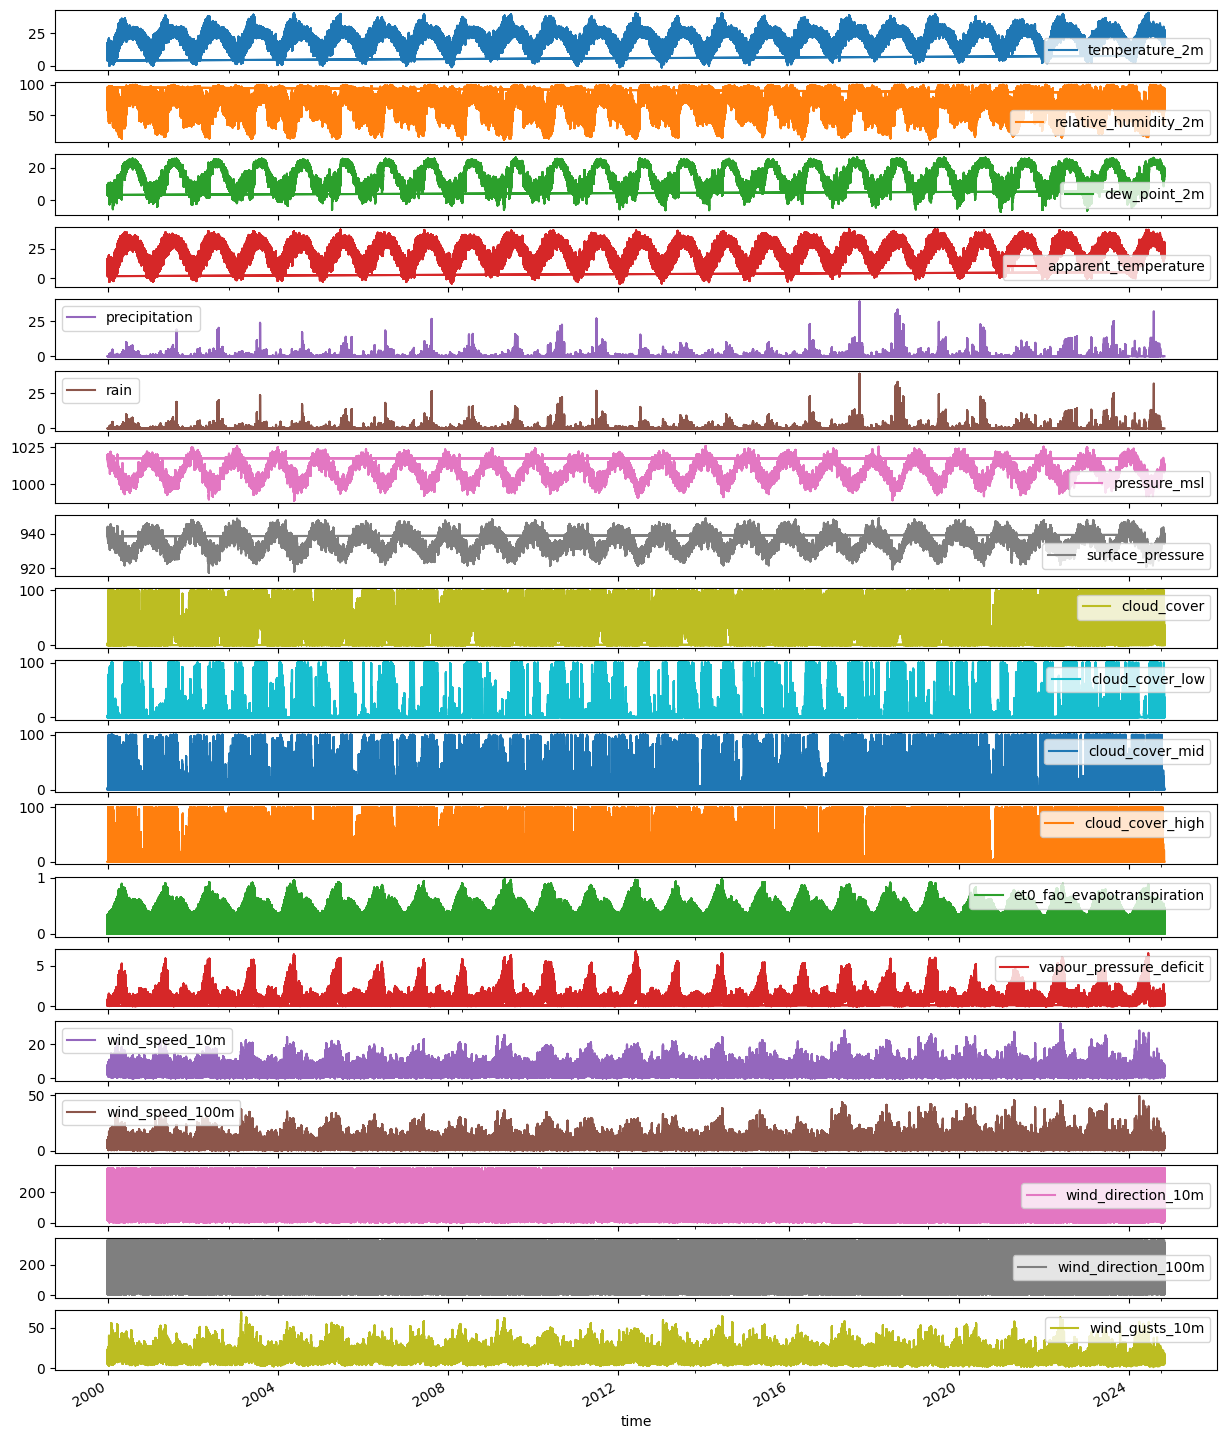

In [ ]:
df_hist.set_index('time')[cols_for_series_plot].plot(subplots=True, figsize=(15, 20))
plt.show()

Correlation Heatmap

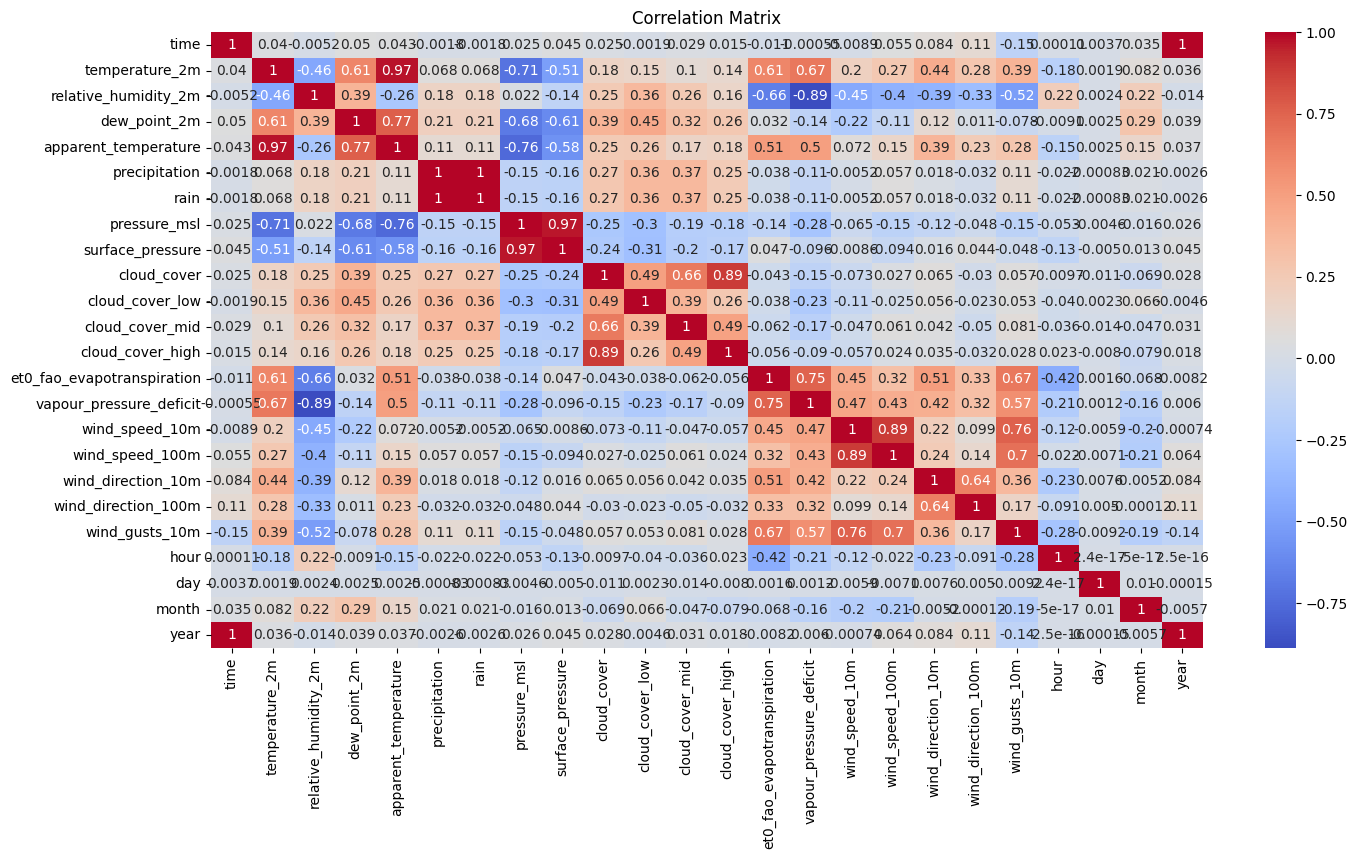

In [43]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Distribution Plot

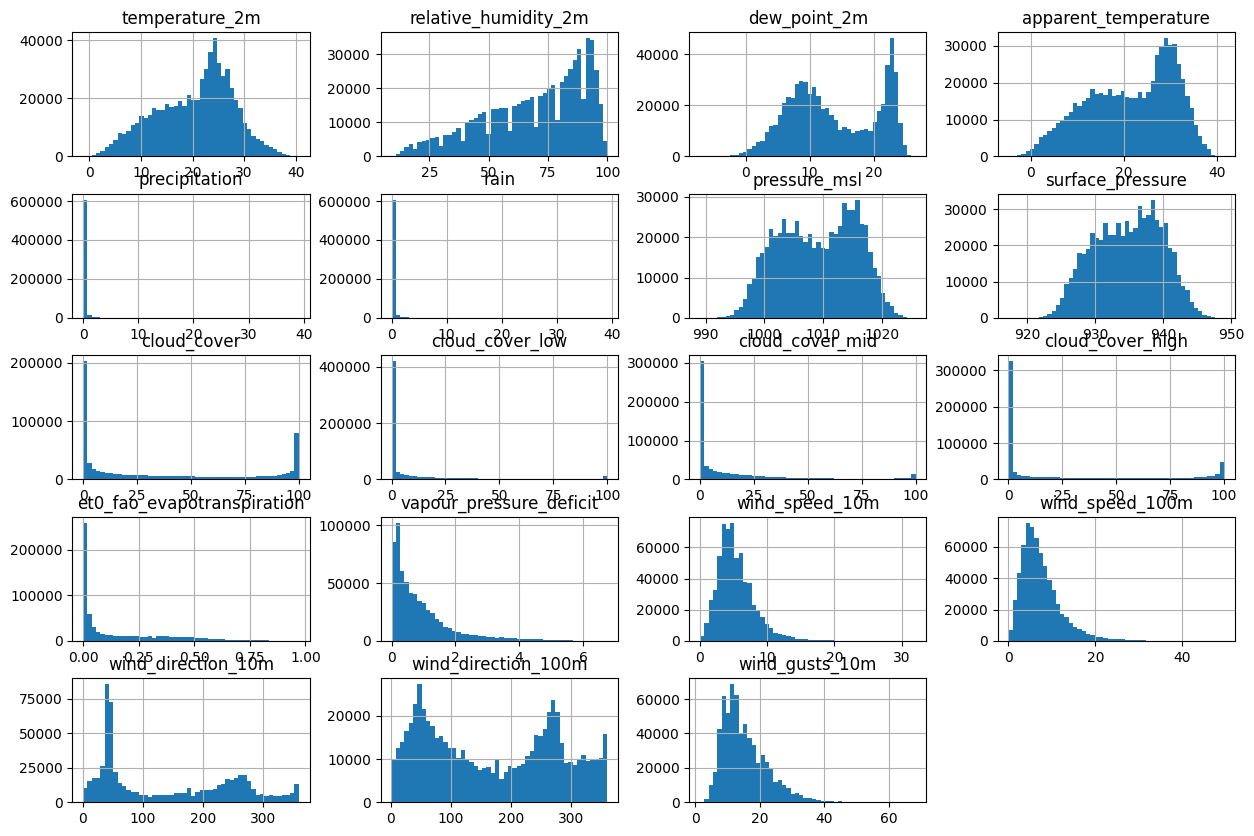

In [44]:
df_hist[['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']].hist(bins=50, figsize=(15, 10))
plt.show()

In [45]:
df_hist01 = df_hist.drop(['cloud_cover', 'cloud_cover_high', 'wind_direction_10m', 'wind_direction_100m'], axis='columns')
df_hist01

time  temperature_2m  relative_humidity_2m  \
0      2000-01-01 00:00:00             4.0                    96   
1      2000-01-01 01:00:00             4.1                    95   
2      2000-01-01 02:00:00             4.0                    95   
3      2000-01-01 03:00:00             6.5                    92   
4      2000-01-01 04:00:00            12.9                    75   
...                    ...             ...                   ...   
638467 2024-10-31 19:00:00            17.1                    84   
638468 2024-10-31 20:00:00            17.2                    80   
638469 2024-10-31 21:00:00            17.3                    77   
638470 2024-10-31 22:00:00            16.8                    78   
638471 2024-10-31 23:00:00            16.7                    78   

        dew_point_2m  apparent_temperature  precipitation  rain  pressure_msl  \
0                3.3                   1.9            0.0   0.0        1017.5   
1                3.3                   1.9            0.0   0.0        1017.9   
2                3.2                   1.9            0.0   0.0        1018.8   
3                5.3                   4.7            0.0   0.0        1019.4   
4                8.6                  12.2            0.0   0.0        1020.0   
...              ...                   ...            ...   ...           ...   
638467          14.4                  17.9            0.0   0.0        1010.8   
638468          13.8                  17.9            0.0   0.0        1010.4   
638469          13.2                  17.9            0.0   0.0        1010.2   
638470          13.0                  17.1            0.0   0.0        1009.9   
638471          12.9                  16.8            0.0   0.0        1009.8   

        surface_pressure  cloud_cover_low  cloud_cover_mid  \
0                  938.5                0                0   
1                  938.9                0                1   
2                  939.7                0                1   
3                  940.9                0                3   
4                  943.1                0                0   
...                  ...              ...              ...   
638467             935.7                0                0   
638468             935.3                0                0   
638469             935.2                0                0   
638470             934.8                0                0   
638471             934.6                0                0   

        et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_10m  \
0                             0.00                     0.04             3.8   
1                             0.00                     0.04             4.1   
2                             0.01                     0.04             3.8   
3                             0.02                     0.07             4.3   
4                             0.13                     0.37             2.0   
...                            ...                      ...             ...   
638467                        0.00                     0.31             4.6   
638468                        0.00                     0.39             3.3   
638469                        0.00                     0.46             3.1   
638470                        0.00                     0.42             4.8   
638471                        0.00                     0.42             5.4   

        wind_speed_100m  wind_gusts_10m  hour  day  month  year  
0                   3.6            11.5     0    1      1  2000  
1                   4.4            11.9     1    1      1  2000  
2                   4.5            11.9     2    1      1  2000  
3                   4.0            13.0     3    1      1  2000  
4                   2.5            13.0     4    1      1  2000  
...                 ...             ...   ...  ...    ...   ...  
638467              7.9             8.6    19   31     10  2024  
638468    

Univariate Analysis

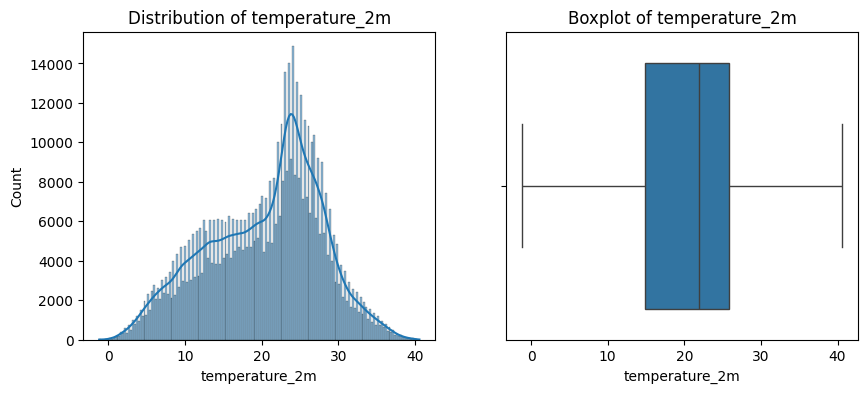

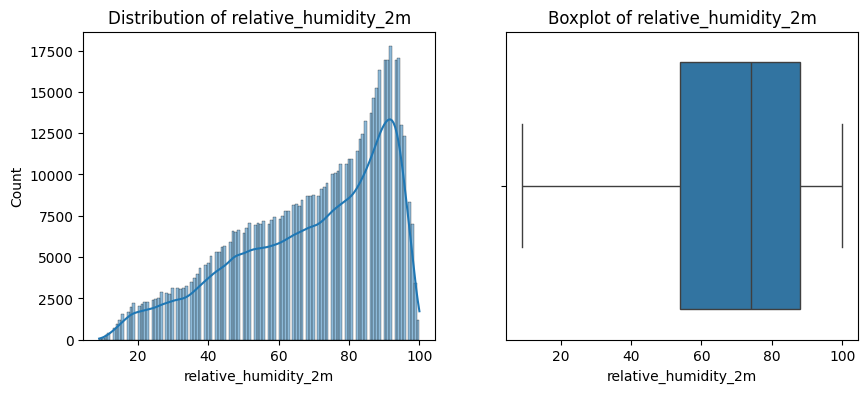

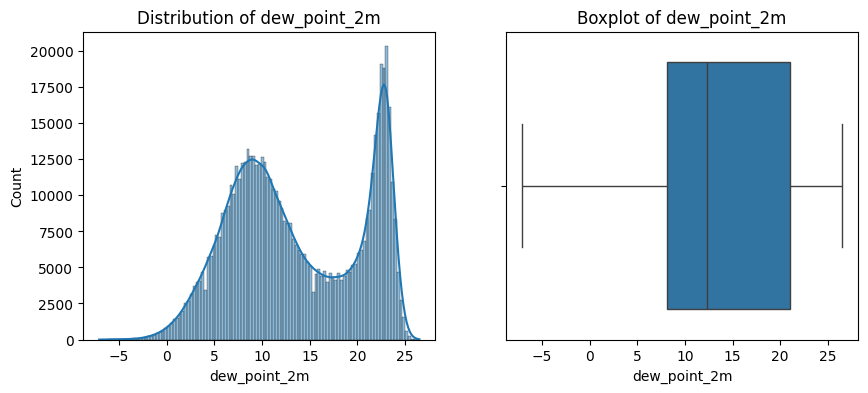

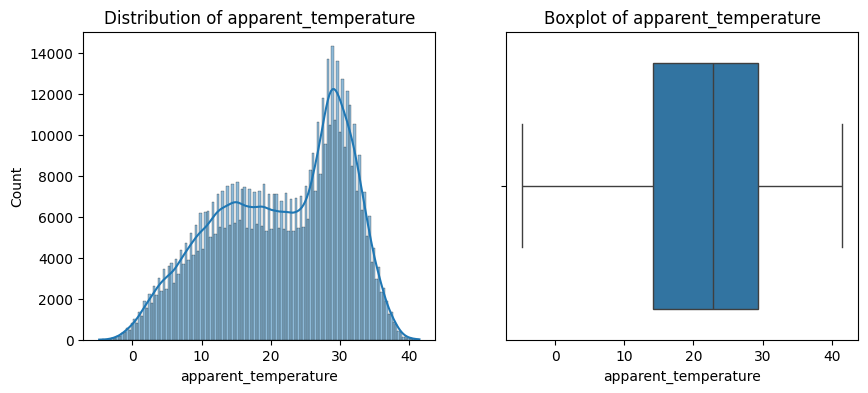

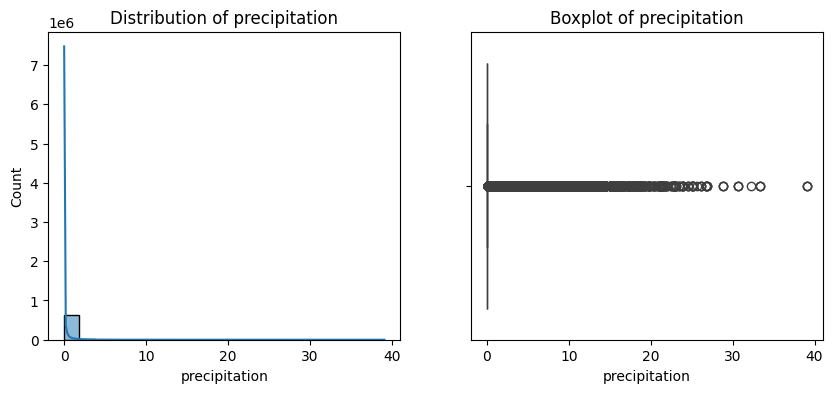

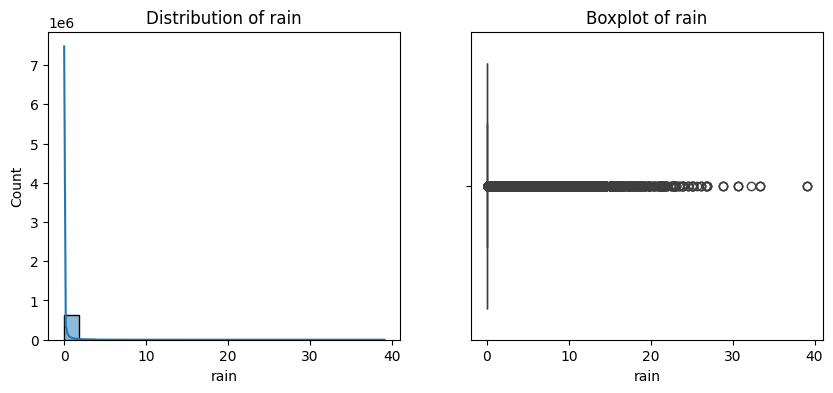

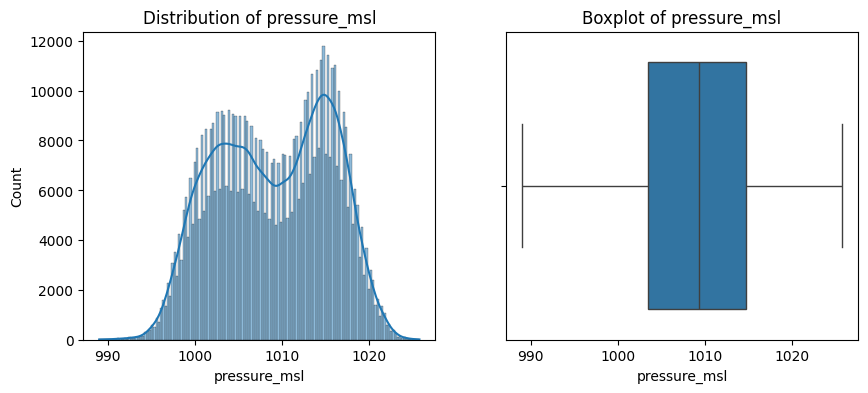

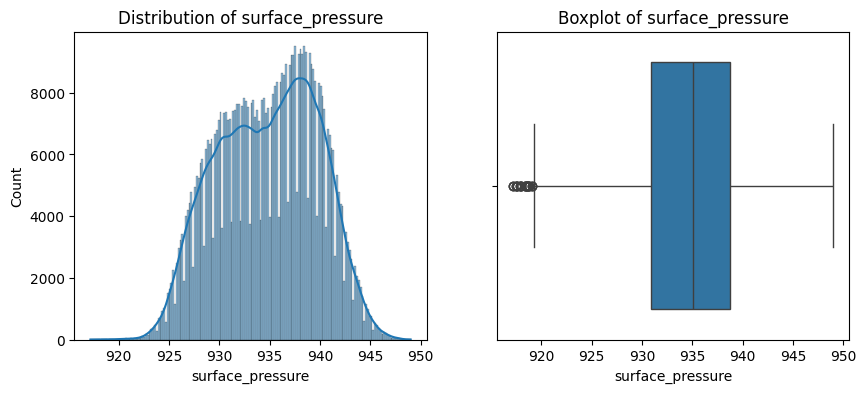

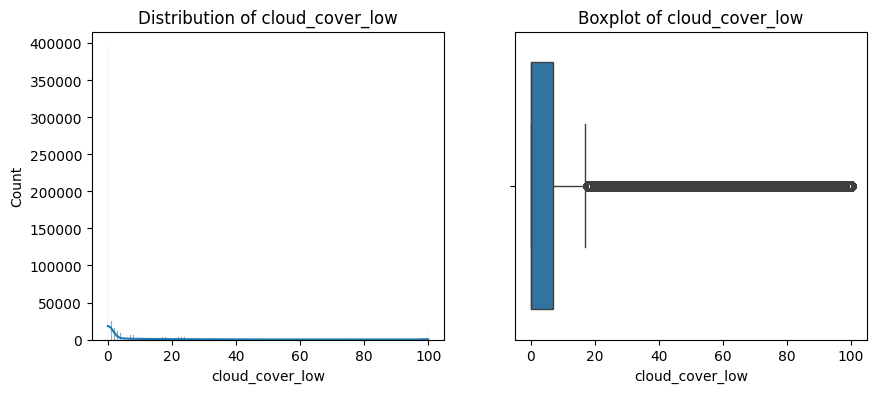

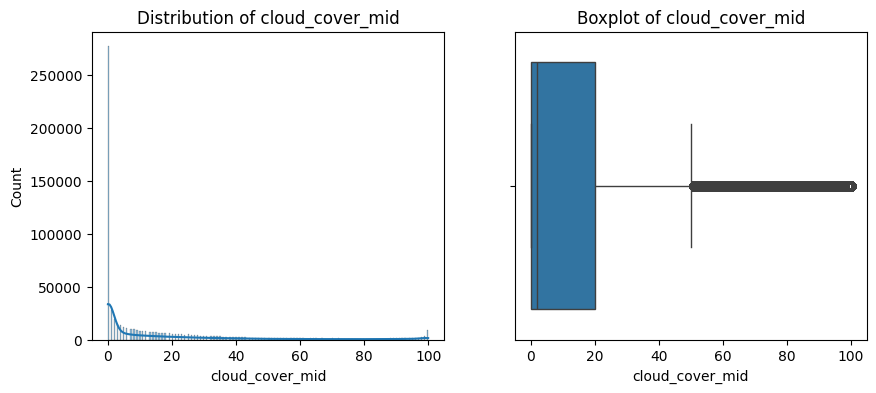

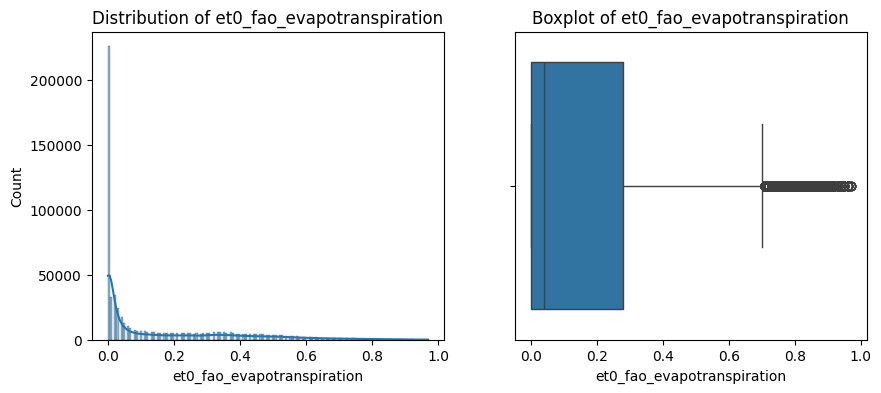

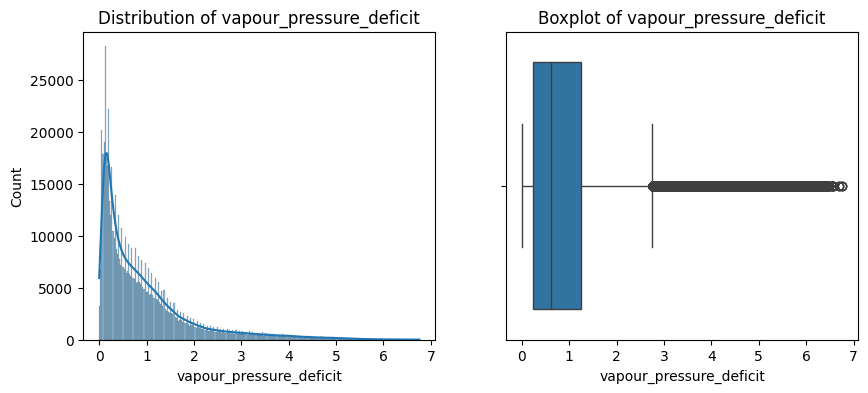

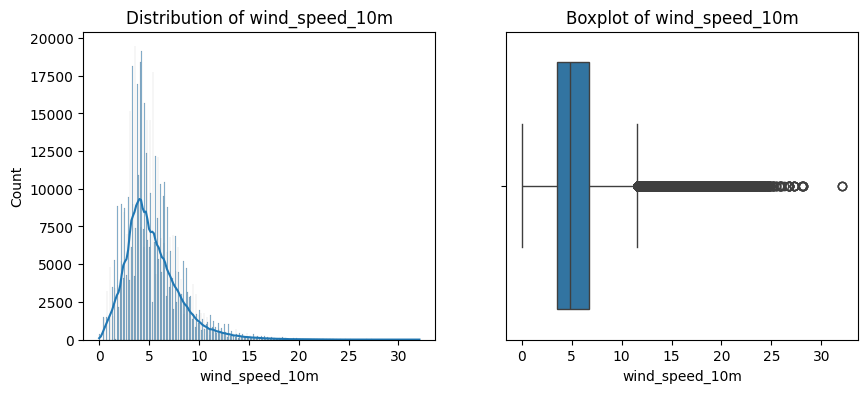

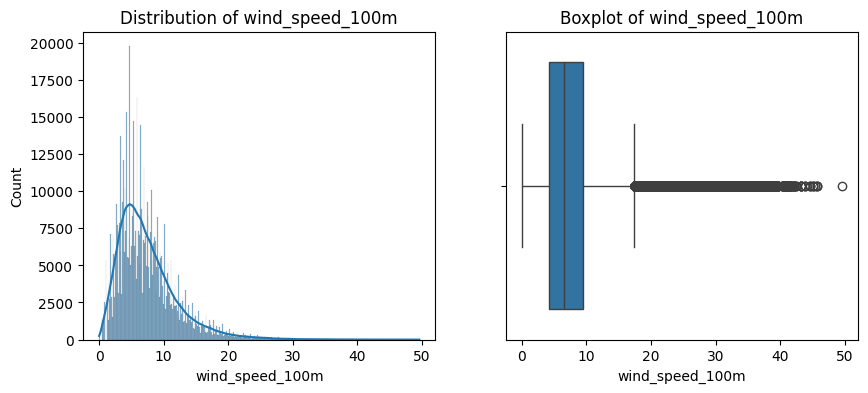

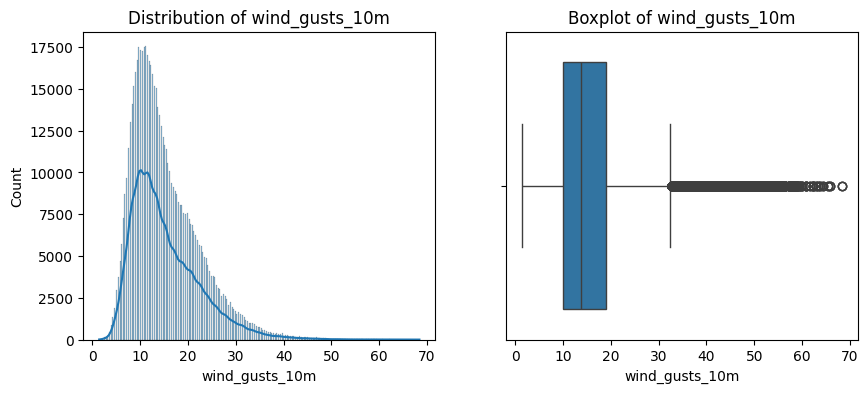

In [46]:
# Plotting histograms and boxplots
for column in df_hist01.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_hist01[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_hist01[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

Multivariate Analysis

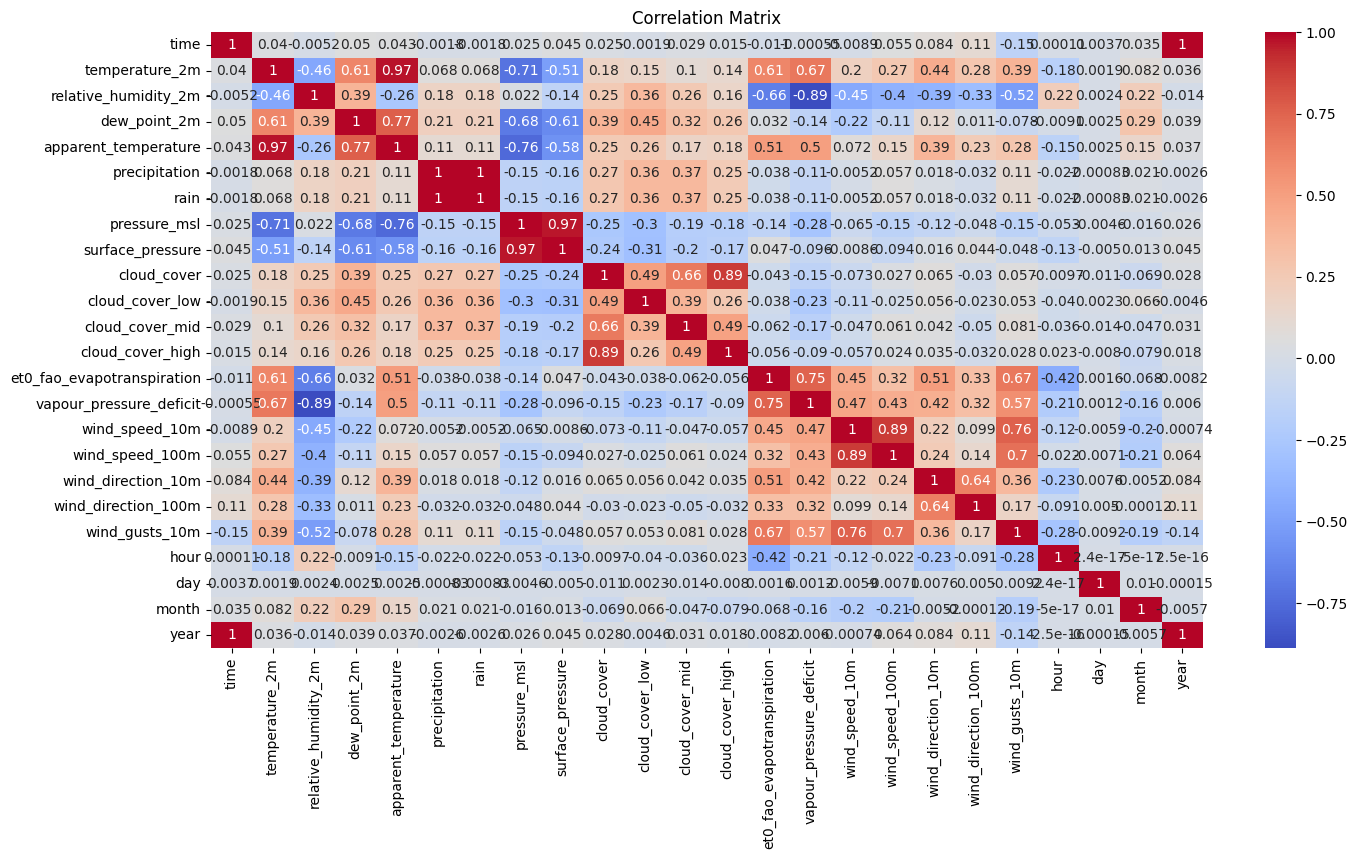

In [47]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Yearly Analysis for Climate Change

In [48]:
columns_to_plot = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m']

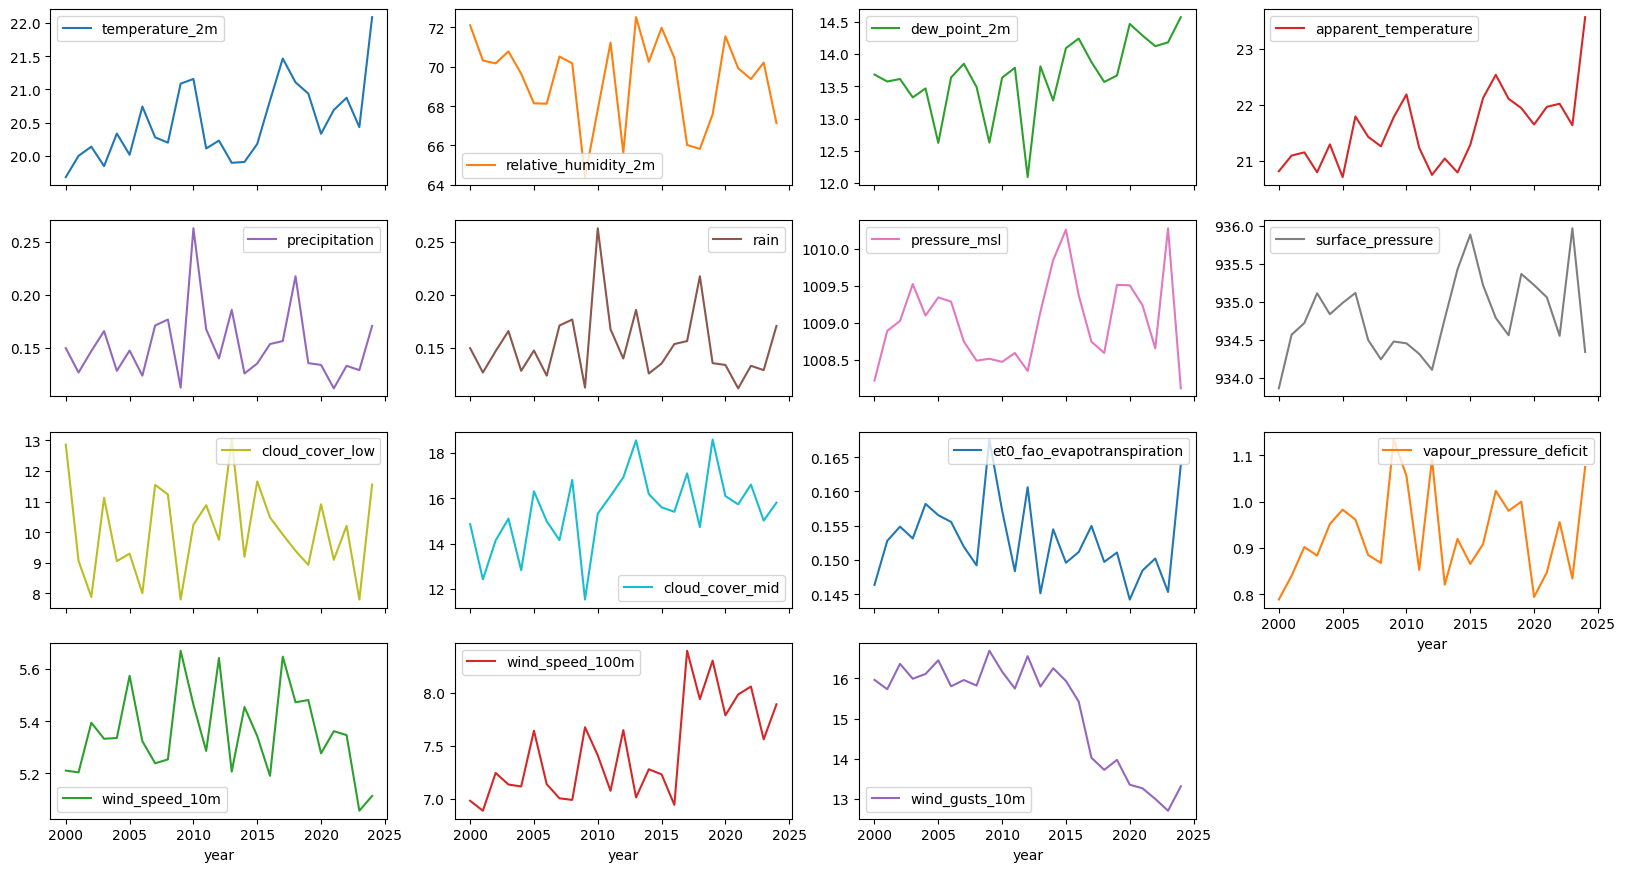

In [49]:
yearly_data = df_hist01.groupby('year').mean()

yearly_data[columns_to_plot].plot(figsize=(20, 16), subplots=True, layout=(6, 4))
plt.show()

Seasonality Analysis

Recent Cloudburst Occurence: 12th May 2021 in Uttrakhand (reported in Chamoli and Tehri districts)

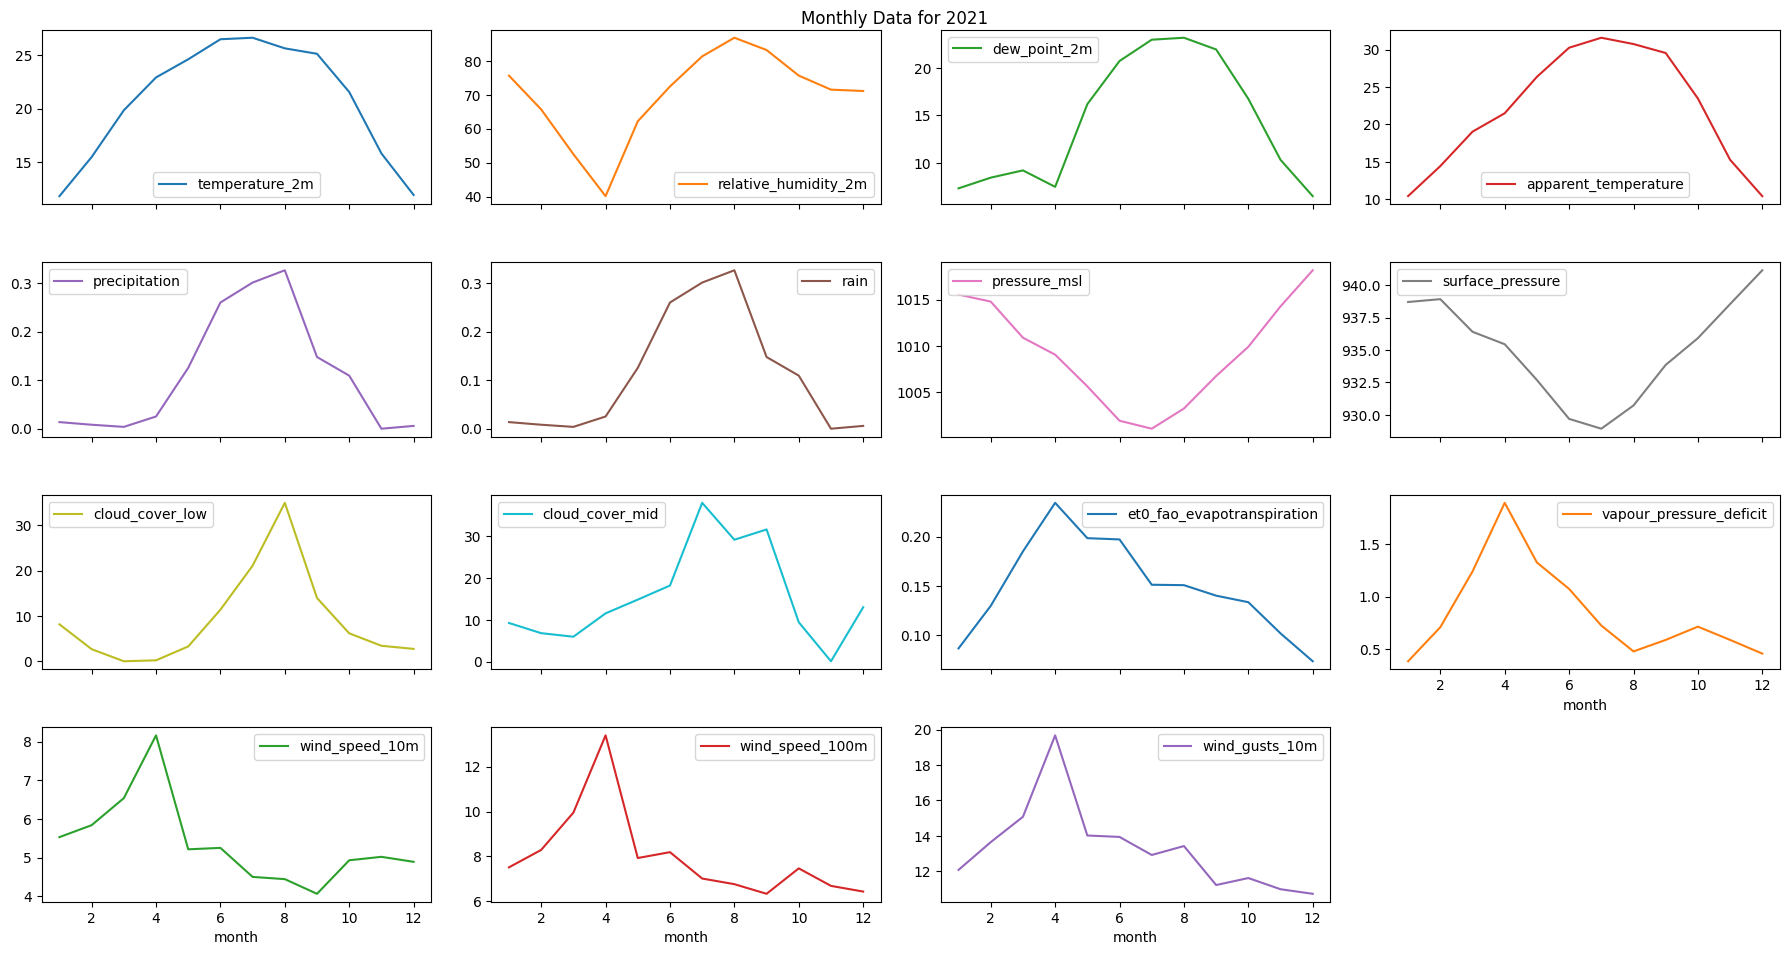

In [50]:
year = 2021
df_hist02 = df_hist01[df_hist01['year'] == year]

monthly_data = df_hist02.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for {year}')
plt.tight_layout()
plt.show()

Zooming onto months

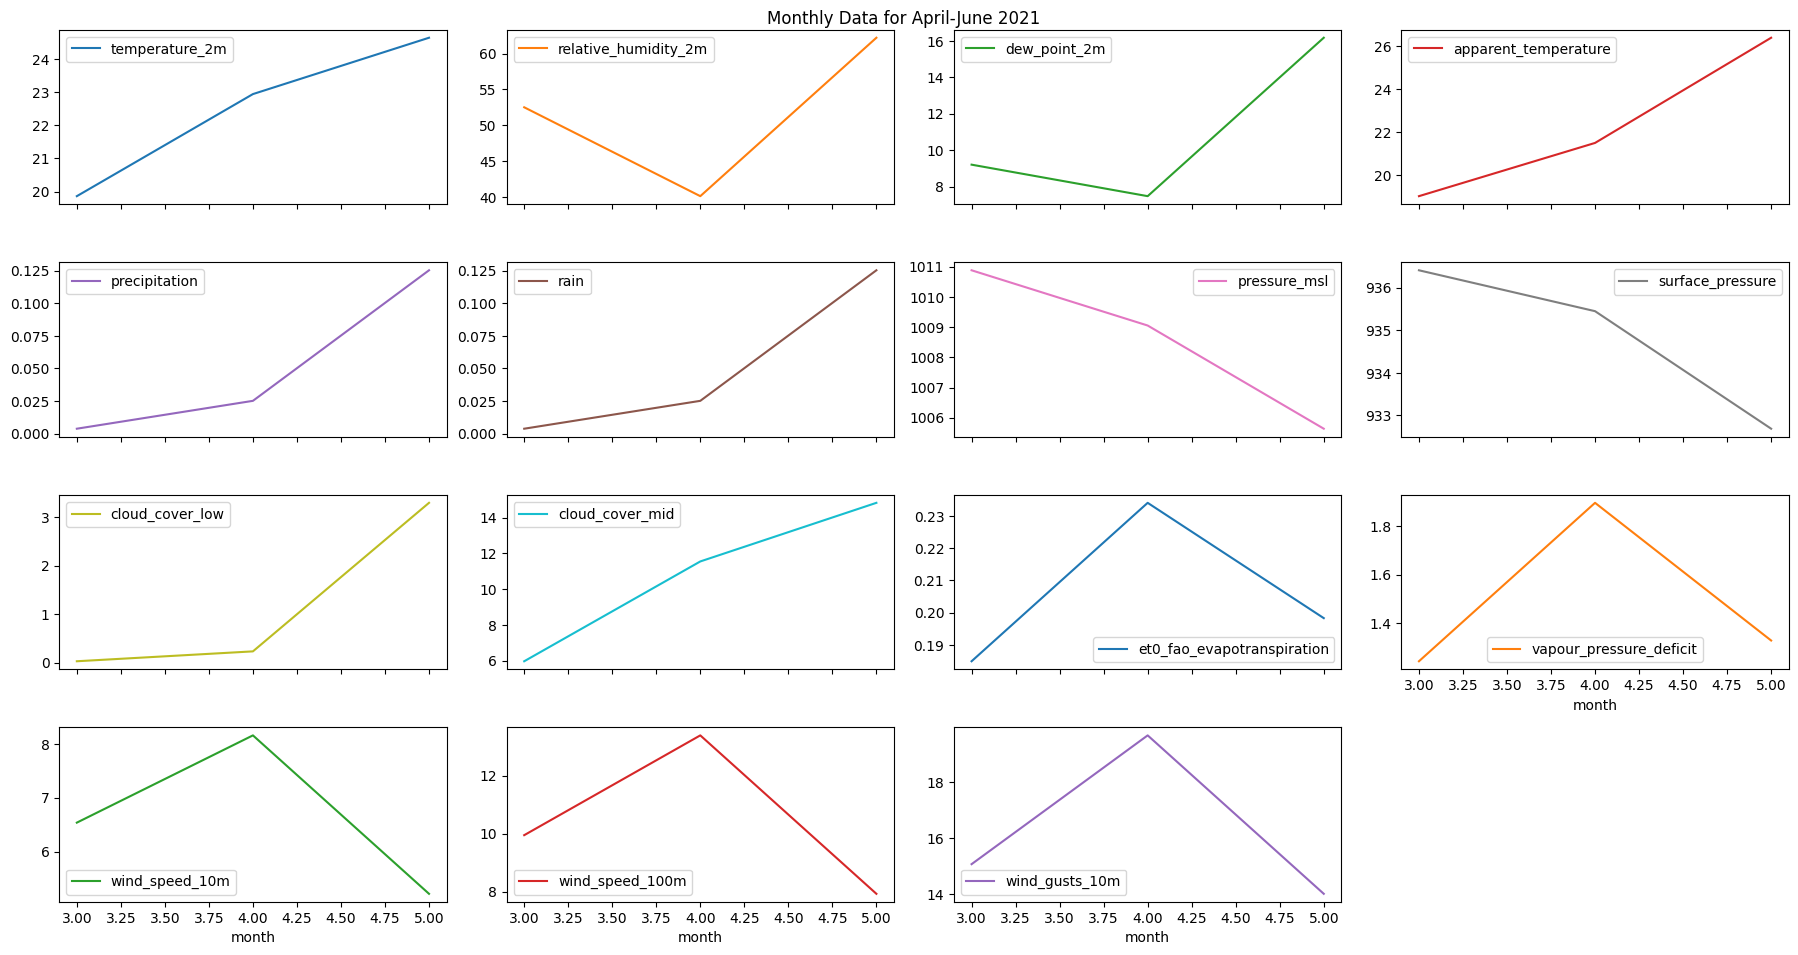

In [51]:
target_months = [3, 4, 5]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for April-June {year}')
plt.tight_layout()
plt.show()

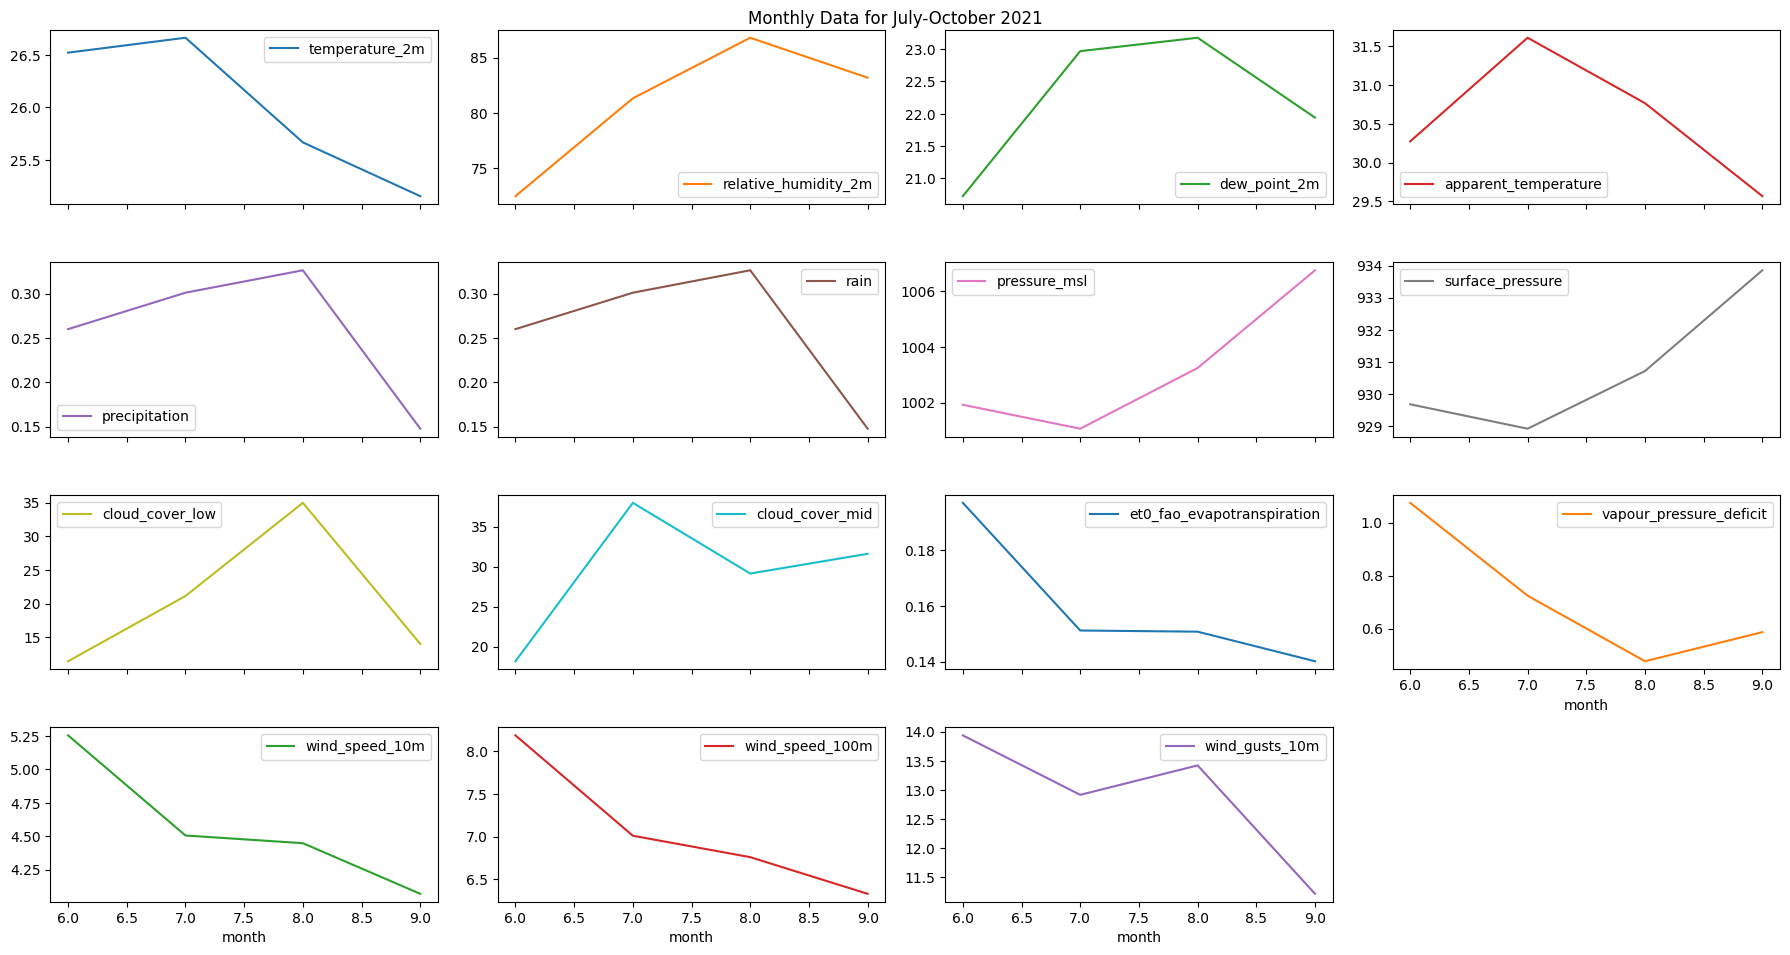

In [52]:
target_months = [6, 7, 8, 9]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for July-October {year}')
plt.tight_layout()
plt.show()

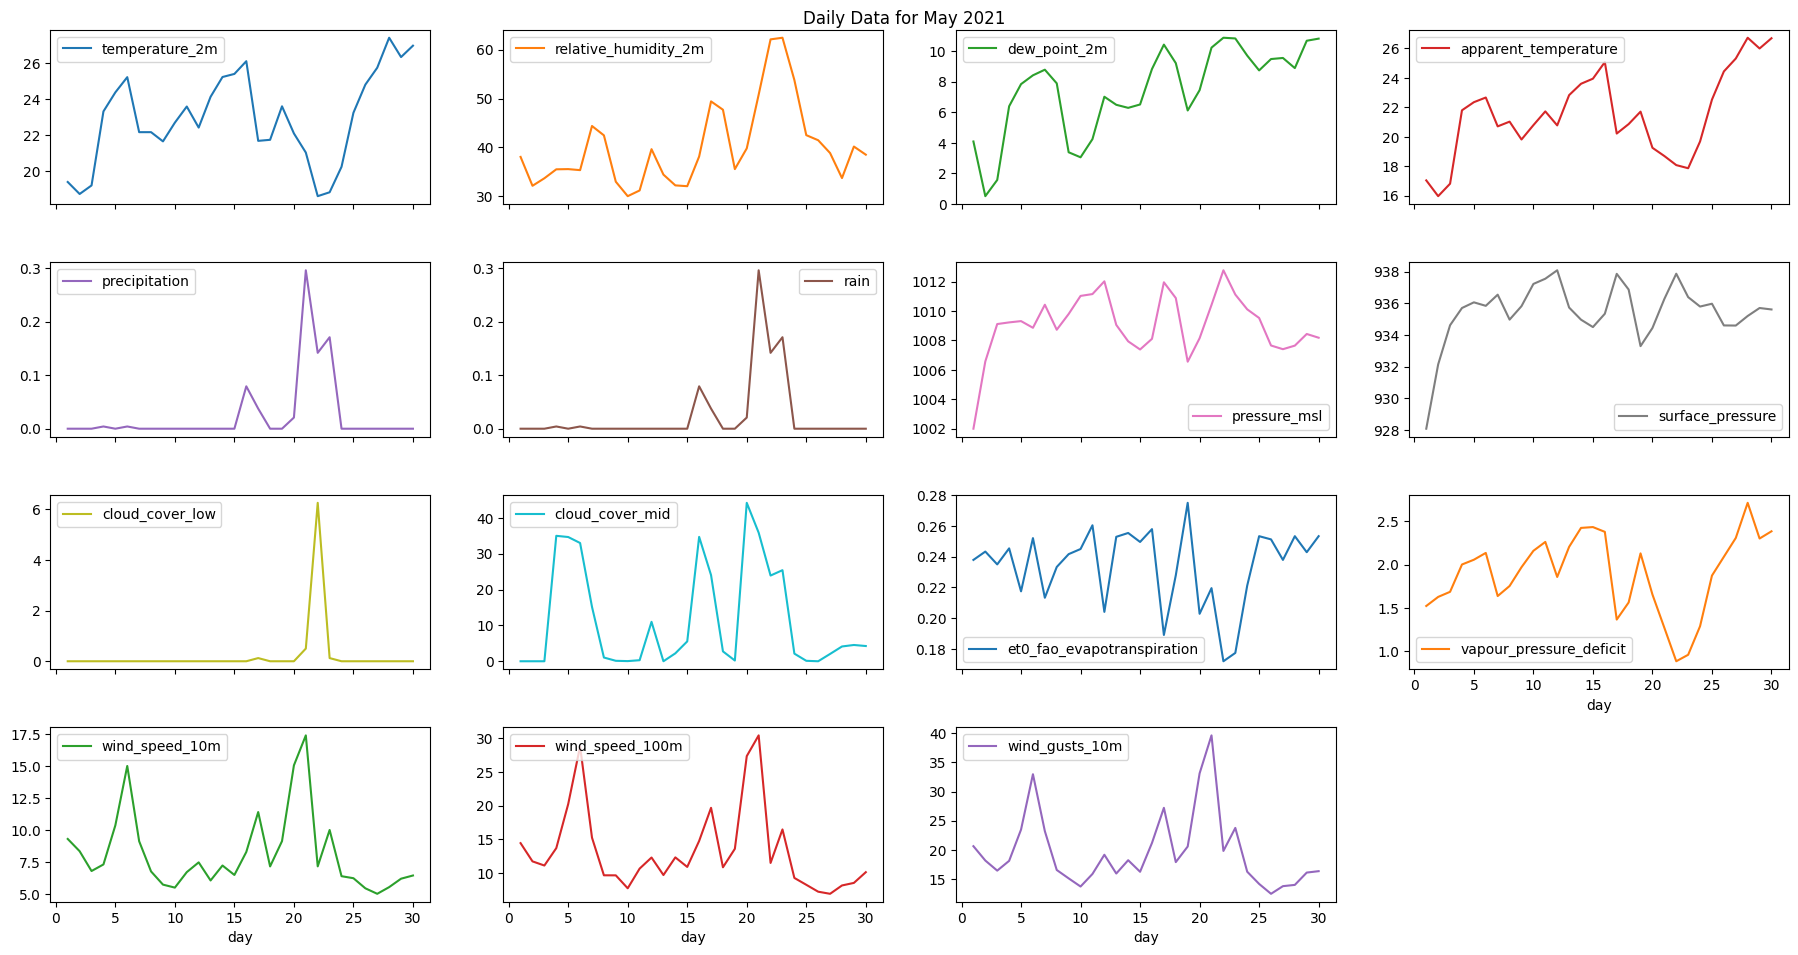

In [59]:
df_may = df_hist02[df_hist02['month'] == 4]
daily_data = df_may.groupby(df_may['day']).mean()

daily_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Daily Data for May {year}')
plt.tight_layout()
plt.show()

In [ ]:
# day_groups = {
#     'day_group1': (4, 8),
#     'day_group2': (8, 14),
#     'day_group3': (14, 18),
#     'day_group4': (18, 22)
# }

# for group_name, (start_day, end_day) in day_groups.items():
#     # Filter for the days in the current group
#     group_data = df_may[(df_may['day'] >= start_day) & (df_may['day'] <= end_day)]
    
#     # Group by both day and hour to get hourly data for each day in the group
#     hourly_group_data = group_data.groupby(['day', 'hour']).mean()
    
#     # Plotting
#     hourly_group_data[columns_to_plot].plot(
#         figsize=(18, 14), 
#         subplots=True, 
#         layout=(8, 4),
#         title=f'Hourly Data for {group_name} (Days {start_day} to {end_day})'
#     )
#     plt.tight_layout()
#     plt.show()

In [74]:
def plot_hourly_data(df, cols, kind='line', day_groups=None):
    """
    Function to plot hourly data for given day groups.

    Parameters:
    - df: DataFrame containing the data.
    - cols: List of columns to plot.
    - kind: Type of plot, either 'line' or 'bar'.
    - day_groups: Dictionary defining day groups with start and end days.

    Returns:
    - None: Displays the plot.
    """
    if day_groups is None:
        day_groups = {
            'day_group1': (4, 8),
            'day_group2': (8, 14),
            'day_group3': (14, 18),
            'day_group4': (18, 22)
        }

    # Loop through each group of days
    for group_name, (start_day, end_day) in day_groups.items():
        # Filter for the days in the current group
        group_data = df[(df['day'] >= start_day) & (df['day'] <= end_day)]
        
        # Group by both day and hour to get hourly data for each day in the group
        hourly_group_data = group_data.groupby(['day', 'hour']).mean()
        
        # Plotting with specified plot type
        hourly_group_data[cols].plot(
            kind=kind,  # Use 'line' or 'bar' based on input
            figsize=(18, 14), 
            subplots=True, 
            layout=(8, 4),
            title=f'Hourly Data for {group_name} (Days {start_day} to {end_day})'
        )
        plt.tight_layout()
        plt.show()

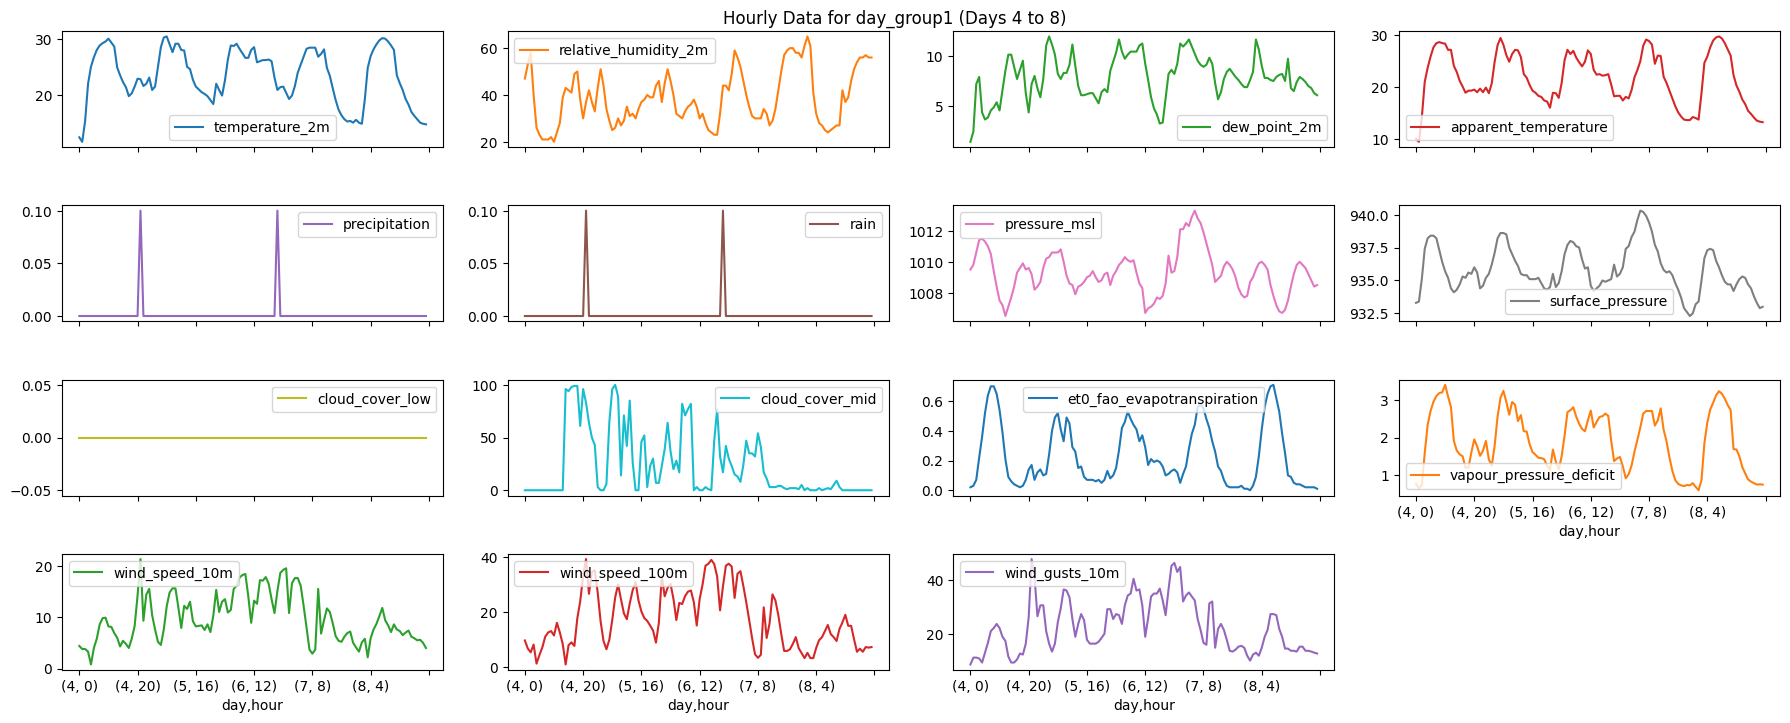

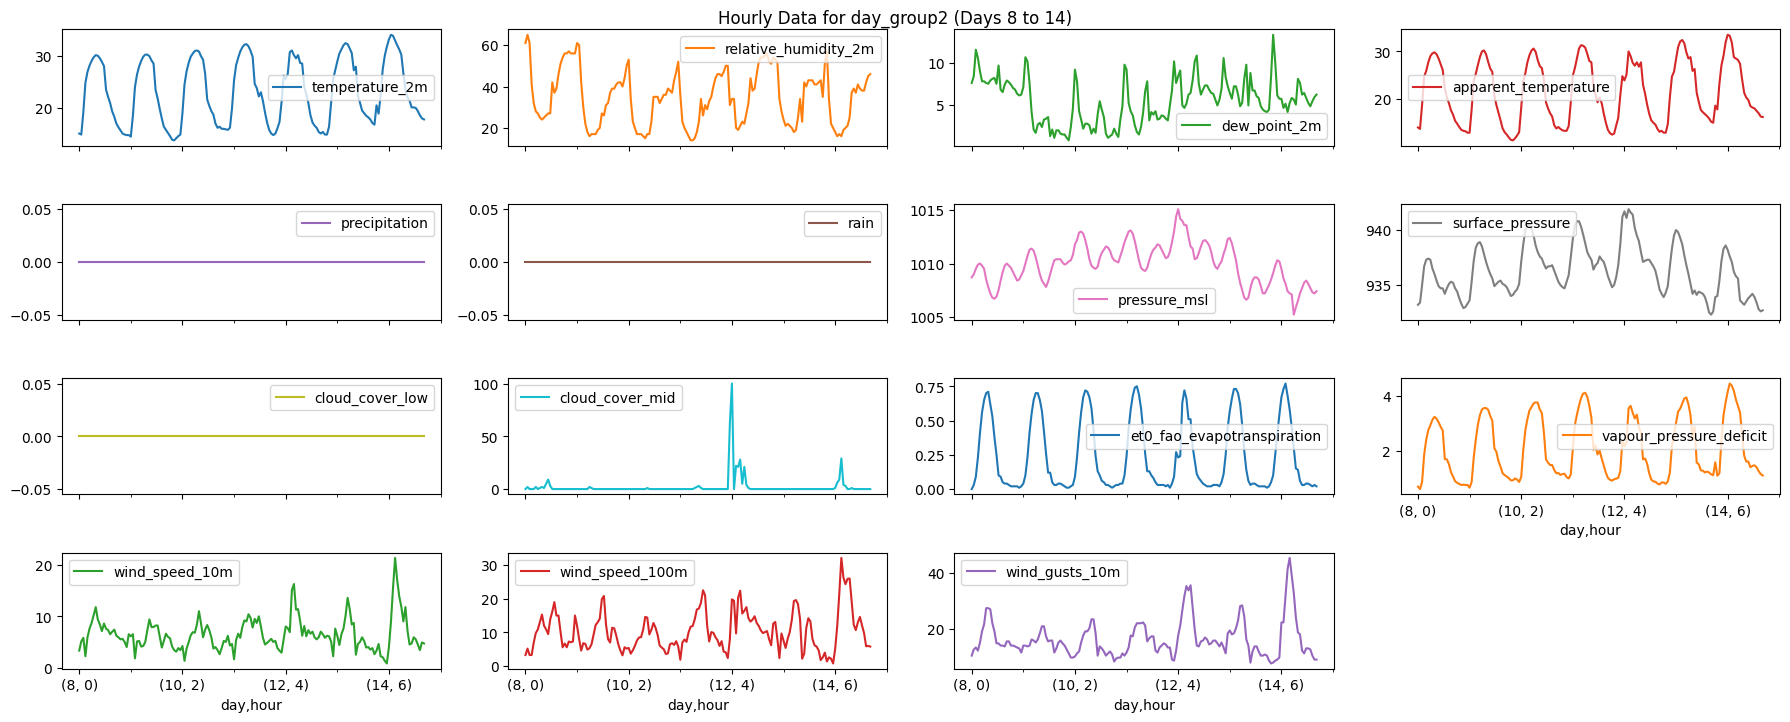

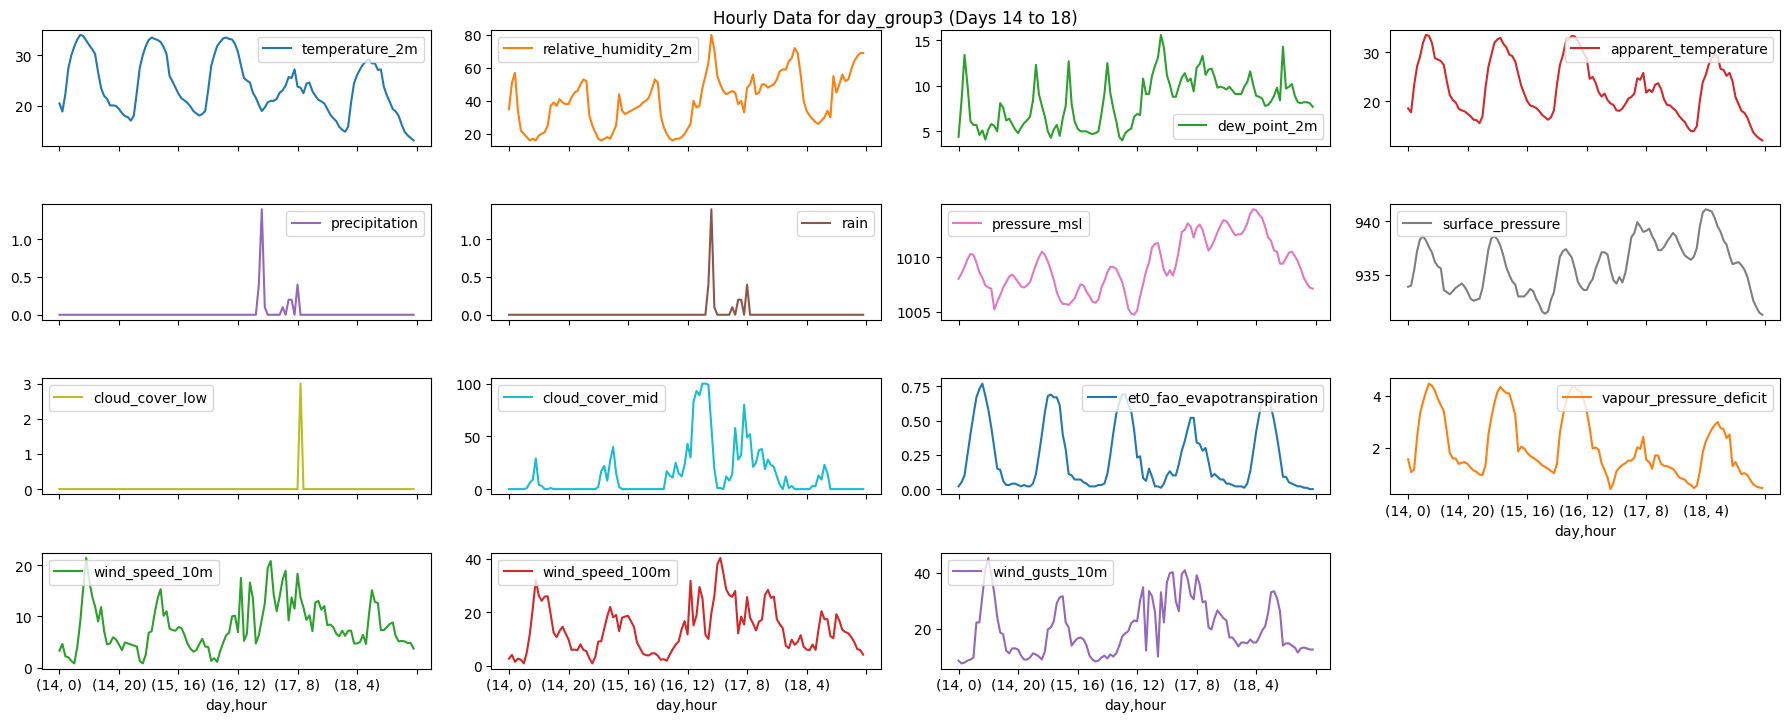

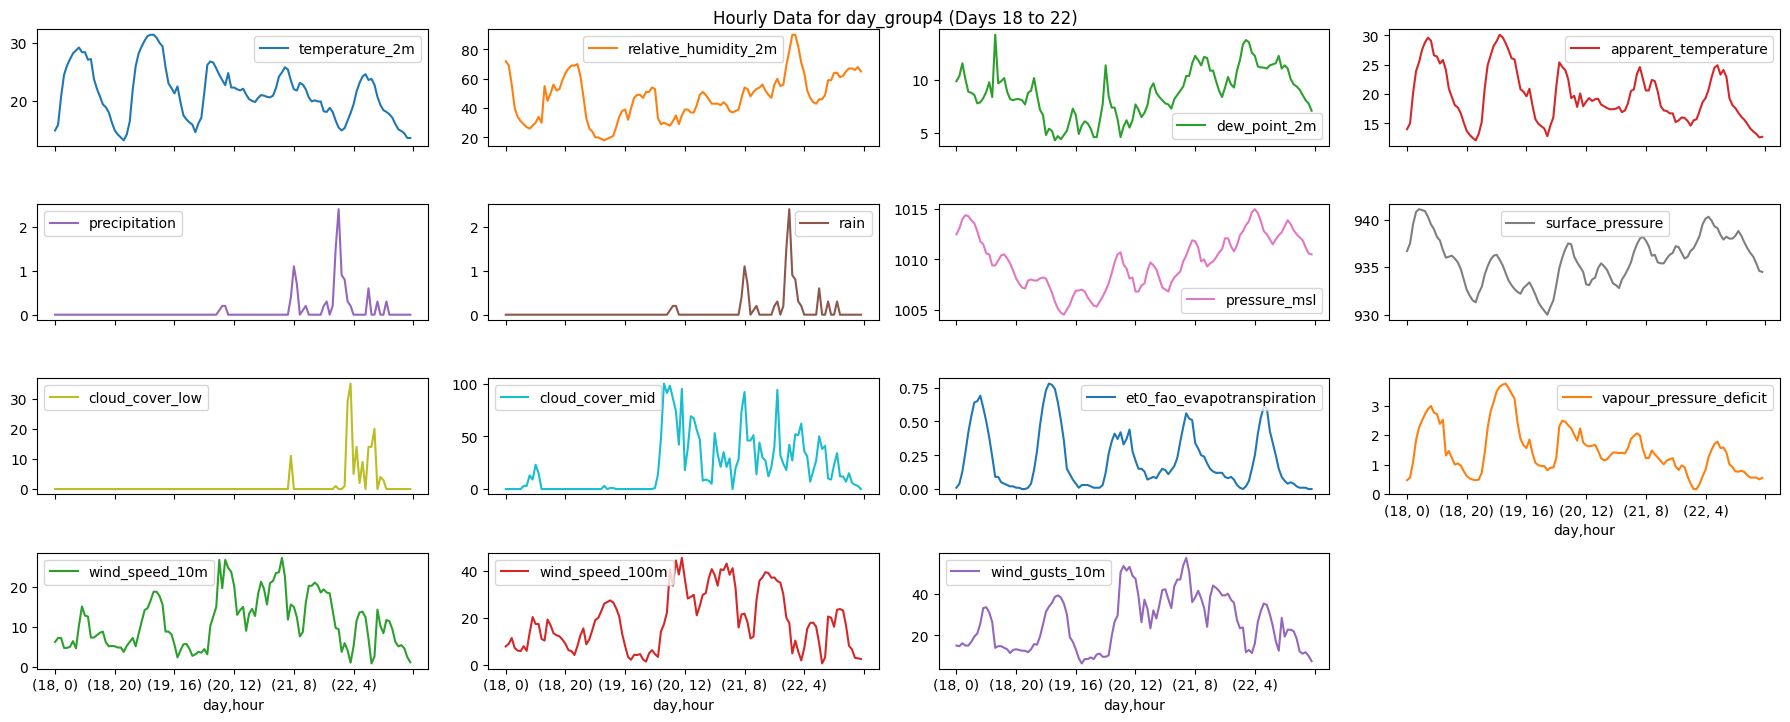

In [76]:
plot_hourly_data(df_may, cols=columns_to_plot, kind='line')

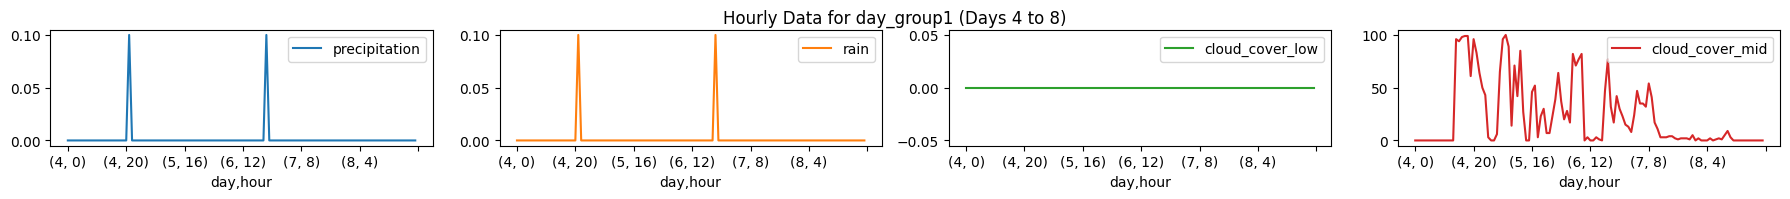

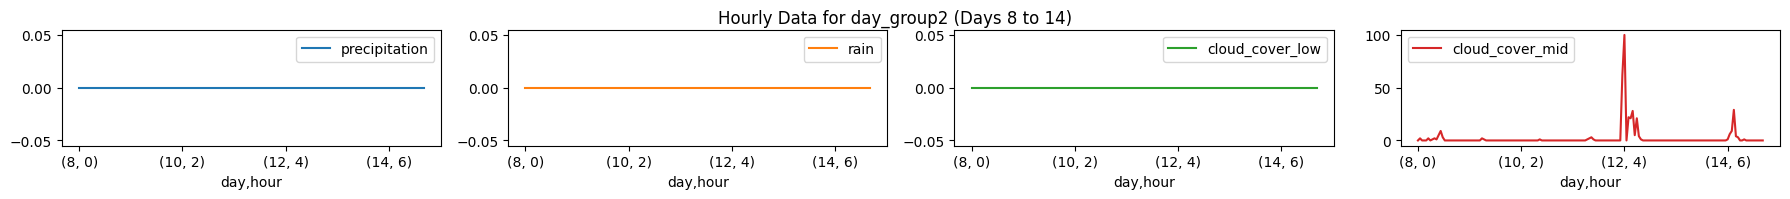

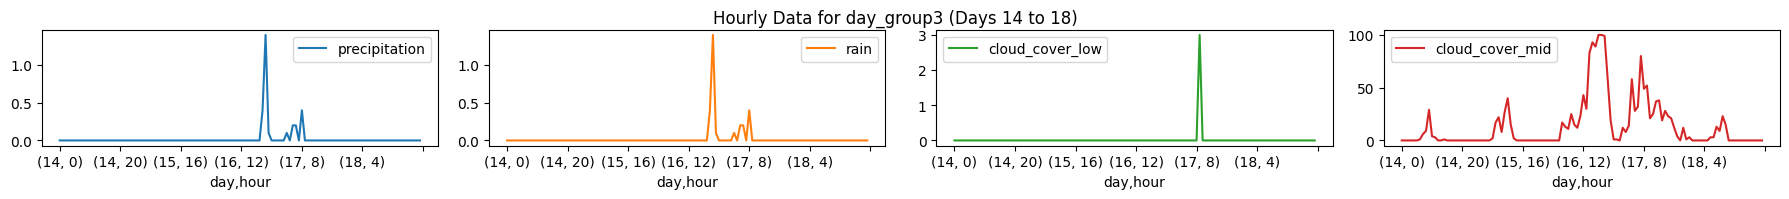

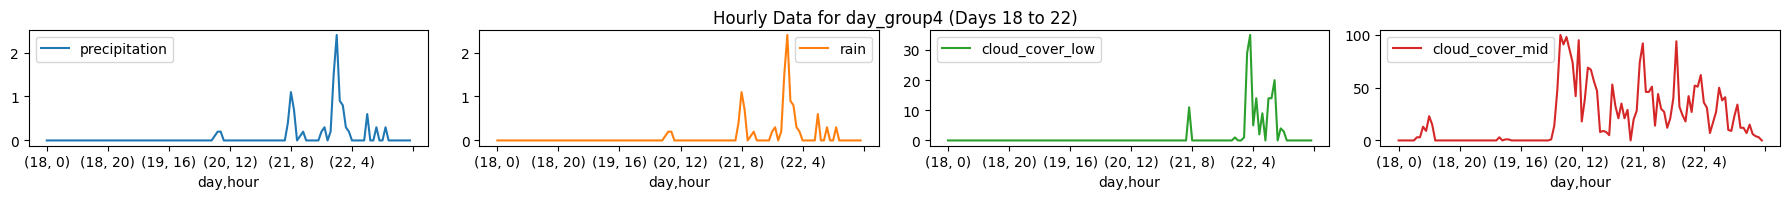

In [80]:
new_columns_to_plot = ['precipitation', 'rain', 'cloud_cover_low', 'cloud_cover_mid']

plot_hourly_data(df_may, cols=new_columns_to_plot, kind='line')

In [83]:
def plot_hourly_data_for_days(df, cols, specific_days, kind='line'):
    """
    Function to plot hourly data for specific days, each in a separate plot.

    Parameters:
    - df: DataFrame containing the data.
    - cols: List of columns to plot.
    - specific_days: List of specific days to plot (e.g., [4, 5, 6]).
    - kind: Type of plot, either 'line' or 'bar'. Default is 'line'.

    Returns:
    - None: Displays the plot.
    """
    if not specific_days:
        print("No specific days provided for plotting.")
        return

    # Loop through each day in the specific days list
    for day in specific_days:
        # Filter data for the current day
        df_day = df[df['day'] == day]

        # Group by hour to get hourly data for the current day
        hourly_day_data = df_day.groupby(['hour']).mean()

        # Plotting for the current day
        hourly_day_data[cols].plot(
            kind=kind,  # Use 'line' or 'bar' based on input
            figsize=(18, 14), 
            subplots=True, 
            layout=(8, 4),
            title=f'Hourly Data for Day {day}'
        )
        plt.tight_layout()
        plt.show()

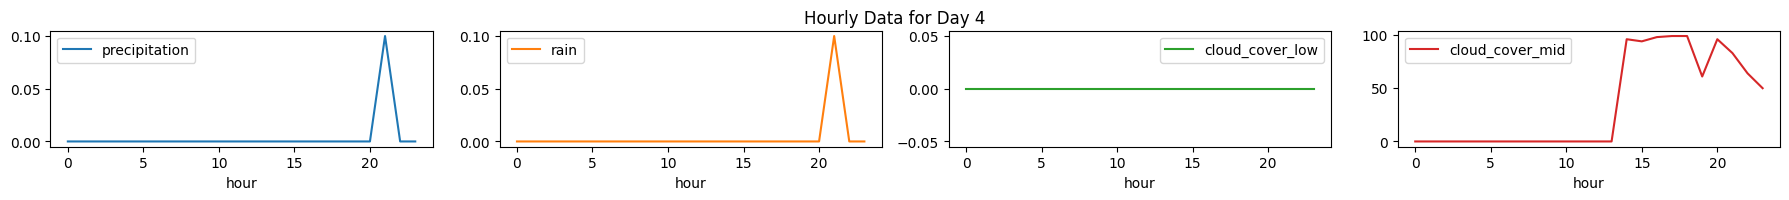

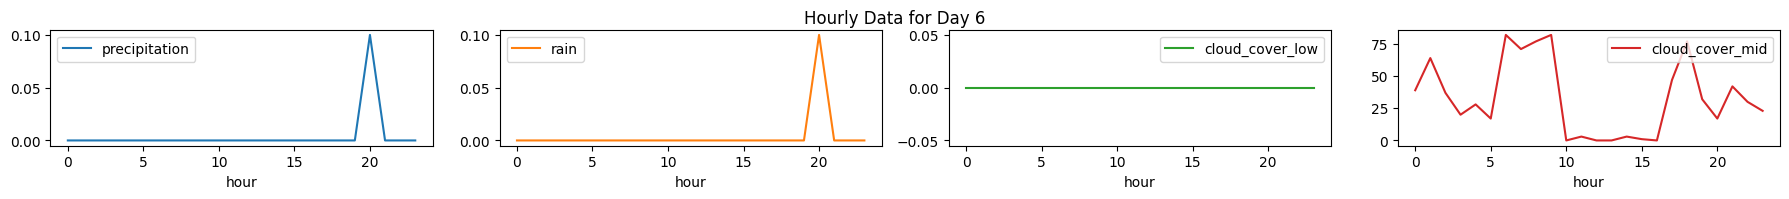

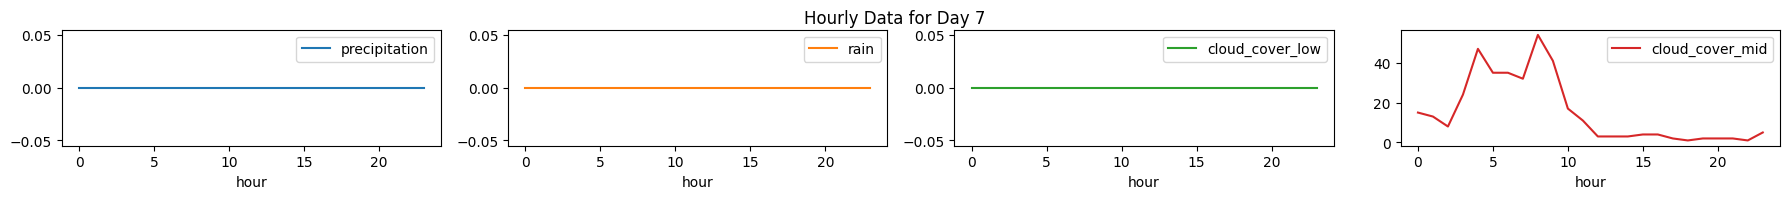

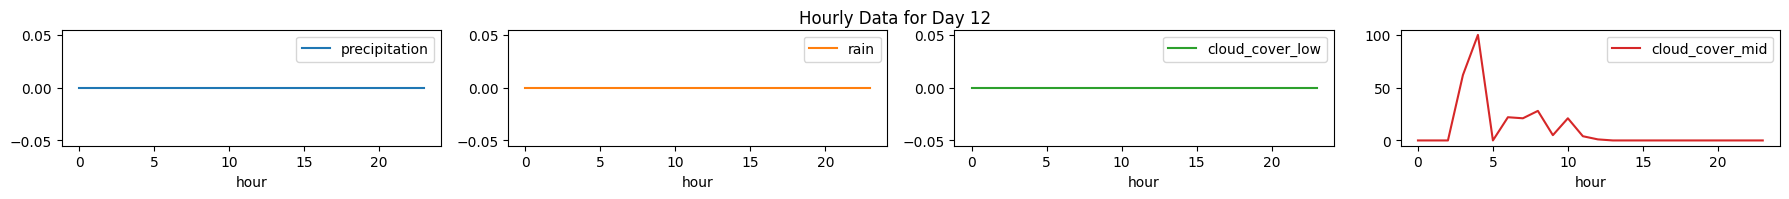

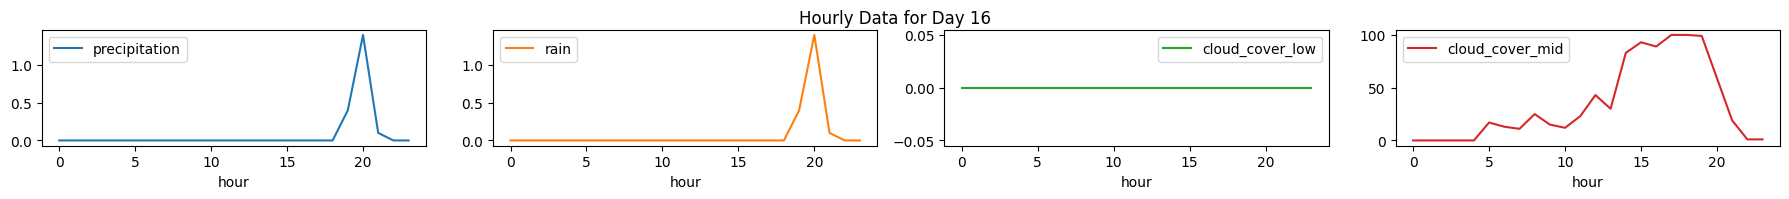

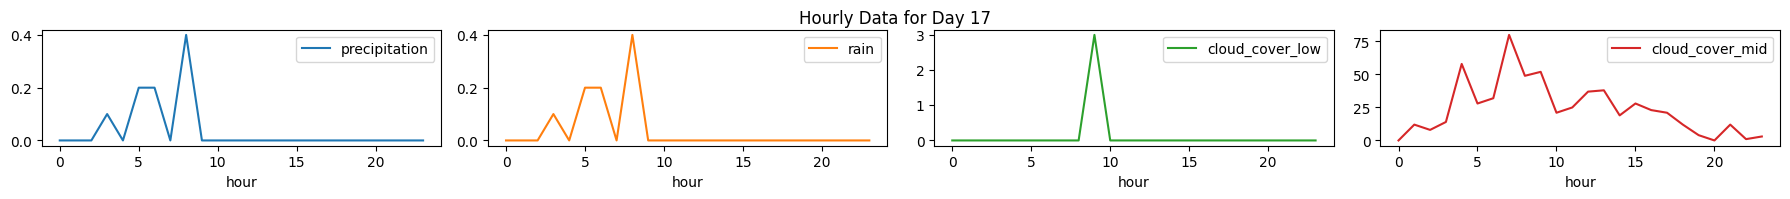

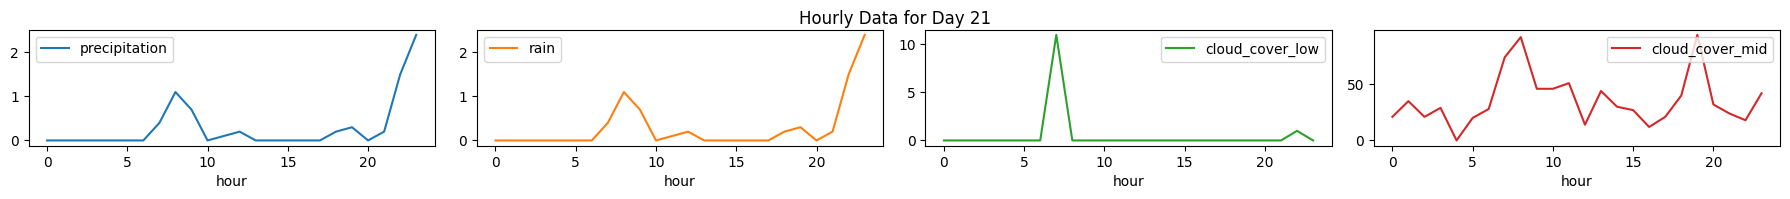

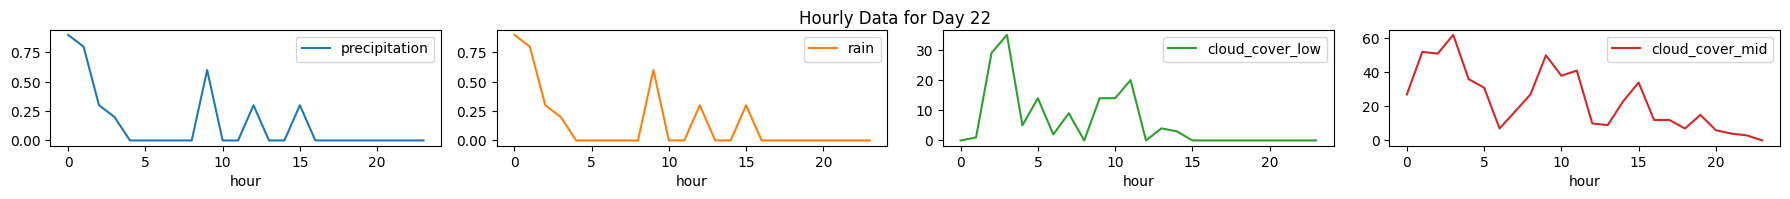

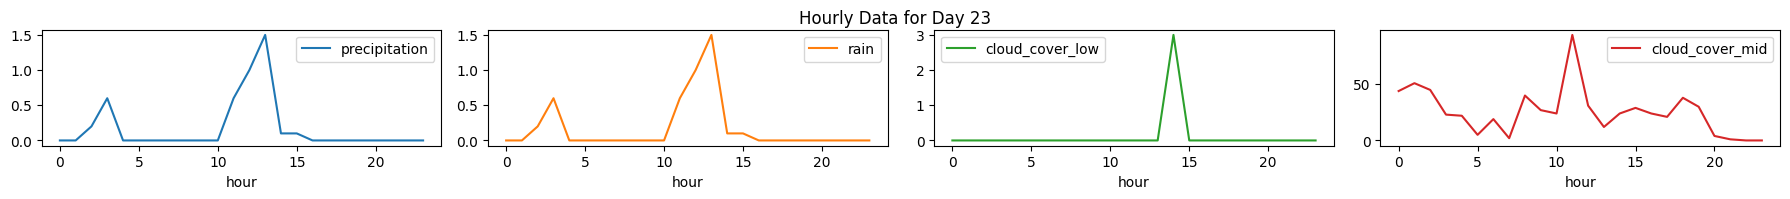

In [84]:
plot_hourly_data_for_days(df_may, cols=new_columns_to_plot, specific_days=[4, 6, 7, 12, 16, 17, 21, 22, 23], kind='line')

In [62]:
df_hist01.head(2)

time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0 2000-01-01 00:00:00             4.0                    96           3.3   
1 2000-01-01 01:00:00             4.1                    95           3.3   

   apparent_temperature  precipitation  rain  pressure_msl  surface_pressure  \
0                   1.9            0.0   0.0        1017.5             938.5   
1                   1.9            0.0   0.0        1017.9             938.9   

   cloud_cover_low  cloud_cover_mid  et0_fao_evapotranspiration  \
0                0                0                         0.0   
1                0                1                         0.0   

   vapour_pressure_deficit  wind_speed_10m  wind_speed_100m  wind_gusts_10m  \
0                     0.04             3.8              3.6            11.5   
1                     0.04             4.1              4.4            11.9   

   hour  day  month  year  
0     0    1      1  2000  
1     1    1      1  2000

In [60]:
df_hist03 = df_hist01.drop(['apparent_temperature', 'pressure_msl', 'surface_pressure'], axis='columns')
df_hist03.head()

time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0 2000-01-01 00:00:00             4.0                    96           3.3   
1 2000-01-01 01:00:00             4.1                    95           3.3   
2 2000-01-01 02:00:00             4.0                    95           3.2   
3 2000-01-01 03:00:00             6.5                    92           5.3   
4 2000-01-01 04:00:00            12.9                    75           8.6   

   precipitation  rain  cloud_cover_low  cloud_cover_mid  \
0            0.0   0.0                0                0   
1            0.0   0.0                0                1   
2            0.0   0.0                0                1   
3            0.0   0.0                0                3   
4            0.0   0.0                0                0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_10m  \
0                        0.00                     0.04             3.8   
1                        0.00                     0.04             4.1   
2                        0.01                     0.04             3.8   
3                        0.02                     0.07             4.3   
4                        0.13                     0.37             2.0   

   wind_speed_100m  wind_gusts_10m  hour  day  month  year  
0              3.6            11.5     0    1      1  2000  
1              4.4            11.9     1    1      1  2000  
2              4.5            11.9     2    1      1  2000  
3              4.0            13.0     3    1      1  2000  
4              2.5            13.0     4    1      1  2000

In [56]:
df_hist03.describe()

time  temperature_2m  relative_humidity_2m  \
count                         638472   638472.000000         638472.000000   
mean   2012-02-21 23:28:27.439012864       20.455628             69.341575   
min              2000-01-01 00:00:00       -1.200000              9.000000   
25%              2006-01-25 21:45:00       14.900000             54.000000   
50%              2012-02-20 19:30:00       21.900000             74.000000   
75%              2018-03-17 17:15:00       25.800000             88.000000   
max              2024-10-31 23:00:00       40.600000            100.000000   
std                              NaN        7.440746             21.316100   

        dew_point_2m  precipitation           rain  cloud_cover_low  \
count  638472.000000  638472.000000  638472.000000    638472.000000   
mean       13.634417       0.151468       0.151463         9.994222   
min        -7.100000       0.000000       0.000000         0.000000   
25%         8.100000       0.000000       0.000000         0.000000   
50%        12.300000       0.000000       0.000000         0.000000   
75%        21.000000       0.000000       0.000000         7.000000   
max        26.500000      39.100000      39.100000       100.000000   
std         6.812205       0.772064       0.772052        21.976768   

       cloud_cover_mid  et0_fao_evapotranspiration  vapour_pressure_deficit  \
count    638472.000000               638472.000000            638472.000000   
mean         15.461527                    0.152492                 0.924477   
min           0.000000                    0.000000                 0.000000   
25%           0.000000                    0.000000                 0.230000   
50%           2.000000                    0.040000                 0.610000   
75%          20.000000                    0.280000                 1.240000   
max         100.000000                    0.970000                 6.760000   
std          25.232272                    0.202839                 0.978884   

       wind_speed_10m  wind_speed_100m  wind_gusts_10m           hour  \
count   638472.000000    638472.000000   638472.000000  638472.000000   
mean         5.362102         7.440227       15.258821      11.500000   
min          0.000000         0.000000        1.400000       0.000000   
25%          3.500000         4.200000       10.100000       5.750000   
50%          4.800000         6.500000       13.700000      11.500000   
75%          6.700000         9.500000       19.100000      17.250000   
max         32.100000        49.600000       68.400000      23.000000   
std          2.775527         4.613926        7.118308       6.922192   

                 day          month           year  
count  638472.000000  638472.000000  638472.000000  
mean       15.729955       6.511371    2011.642296  
min         1.000000       1.000000    2000.000000  
25%         8.000000       4.000000    2006.000000  
50%        16.000000       7.000000    2012.000000  
75%        23.000000      10.000000    2018.000000  
max        31.000000      12.000000    2024.000000  
std         8.800241       3.444327       7.009936

# Feature Engineering

In [ ]:
columns_to_apply = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain', 'cloud_cover_low', 'cloud_cover_mid', 
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m'
]